## 📖 Background
You work for an international HR consultancy helping companies attract and retain top talent in the competitive tech industry. As part of your services, you provide clients with insights into industry salary trends to ensure they remain competitive in hiring and compensation practices.

Your team wants to use a data-driven approach to analyse how various factors—such as job role, experience level, remote work, and company size—impact salaries globally. By understanding these trends, you can advise clients on offering competitive packages to attract the best talent.

In this competition, you’ll explore and visualise salary data from thousands of employees worldwide. f you're tackling the advanced level, you'll go a step further—building predictive models to uncover key salary drivers and providing insights on how to enhance future data collection.

## 💾 The data

The data comes from a survey hosted by an HR consultancy, available in `'salaries.csv'`.

#### Each row represents a single employee's salary record for a given year:
- **`work_year`** - The year the salary was paid.  
- **`experience_level`** - Employee experience level:  
  - **`EN`**: Entry-level / Junior  
  - **`MI`**: Mid-level / Intermediate  
  - **`SE`**: Senior / Expert  
  - **`EX`**: Executive / Director  
- **`employment_type`** - Employment type:  
  - **`PT`**: Part-time  
  - **`FT`**: Full-time  
  - **`CT`**: Contract  
  - **`FL`**: Freelance  
- **`job_title`** - The job title during the year.  
- **`salary`** - Gross salary paid (in local currency).  
- **`salary_currency`** - Salary currency (ISO 4217 code).  
- **`salary_in_usd`** - Salary converted to USD using average yearly FX rate.  
- **`employee_residence`** - Employee's primary country of residence (ISO 3166 code).  
- **`remote_ratio`** - Percentage of remote work:  
  - **`0`**: No remote work (<20%)  
  - **`50`**: Hybrid (50%)  
  - **`100`**: Fully remote (>80%)  
- **`company_location`** - Employer's main office location (ISO 3166 code).  
- **`company_size`** - Company size:  
  - **`S`**: Small (<50 employees)  
  - **`M`**: Medium (50–250 employees)  
  - **`L`**: Large (>250 employees)  

## 💪 Competition challenge

In this final level, you’ll develop predictive models and dive deeper into the dataset. If this feels overwhelming, consider completing the earlier levels first!
Create a report that answers the following:
- Analyse how factors such as country, experience level, and remote ratio impact salaries for Data Analysts, Data Scientists, and Machine Learning Engineers. In which conditions do professionals achieve the highest salaries?
- Develop a predictive model to estimate an employee’s salary (in USD) using experience level, company location, and remote ratio. Which features are the strongest predictors of salary?
- Expand your model by incorporating additional features, such as company size and employment type. Evaluate its performance, what improves, and what doesn’t? Finally, propose new features to make future salary predictions even more accurate future salary predictions even more accurate.

# The Data Talent Race: Insights to Attract & Retain Top Professionals

The rapid expansion of the tech industry has intensified competition for top data professionals, making it more challenging for companies to attract and retain the right talent. Roles such as Data Scientists, Machine Learning Engineers, and AI Specialists are pivotal in driving innovation and fueling data-driven decision-making. Yet, evolving skill demands, shifting work preferences, and rising compensation expectations add complexity to hiring strategies.

This report analyzes global salary data to uncover key compensation trends based on job roles, experience levels, work models, and company sizes. Armed with these insights, businesses can refine their hiring strategies, optimize salary structures, and position themselves as leading employers in the competitive data job market.

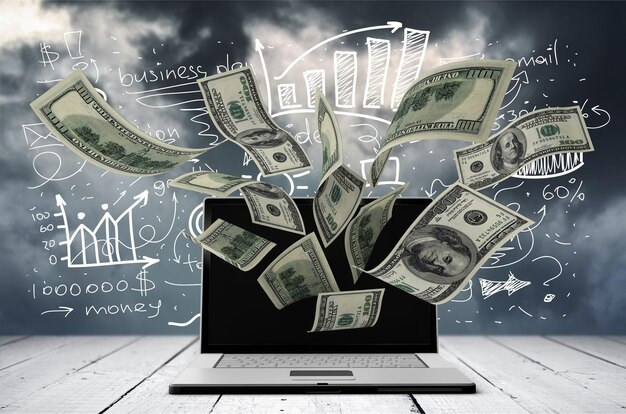

### 📌 Key Insights at a Glance

📊 **Survey Insights**
- 57,194 tech professionals surveyed
- 90.7% work for USA based companies, with 90.6% of employees residing in USA

📈 **Tech Job Market Boom**
- 448% increase in tech job openings from 2023 to 2024
- Data Scientists (19%) and Data Analysts (17.4%) dominate the job market

💰 **Salary Growth & Compensation Trends**
- Average annual salary jumped by 34.3% in 2022 to 134K, continuing its rise in 2023 & 2024
- 7 of the top 10 highest-paying roles in 2024 belong to Machine Learning, with 5 of them in managerial positions
- Machine Learning roles lead as the highest-paying category, averaging 192K per year
- 2024 salary distribution is more balanced, with a smaller gap between the highest and lowest-paying regions

🏢 **Impact of Company Size on Salaries**
- Larger companies consistently offer higher, more stable salaries
- Moving from entry-level in a small company to mid-level in a medium-sized company can double salary earnings

👨‍💻 **Employment Type & Work Model Preferences**
- Full-time roles dominate 99.6% of job opportunities and offer the highest salaries
- Onsite jobs pay slightly higher than remote roles, but the gap is minimal and offset by work flexibility

🌍 **Regional Salary Trends**
- USA is the only country consistently appearing in the top 10 salary-paying locations across 5 years
- 2023 saw a record-breaking salary peak—for the first time, salaries crossed 300K. 
- Whereas in previous years, no location exceeded 200K


In [186]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [187]:
df = pd.read_csv('salaries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57194 entries, 0 to 57193
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           57194 non-null  int64 
 1   experience_level    57194 non-null  object
 2   employment_type     57194 non-null  object
 3   job_title           57194 non-null  object
 4   salary              57194 non-null  int64 
 5   salary_currency     57194 non-null  object
 6   salary_in_usd       57194 non-null  int64 
 7   employee_residence  57194 non-null  object
 8   remote_ratio        57194 non-null  int64 
 9   company_location    57194 non-null  object
 10  company_size        57194 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.8+ MB


In [188]:
df['company_location'].value_counts(normalize=True)

company_location
US    0.907595
CA    0.031944
GB    0.028412
DE    0.003287
AU    0.002972
        ...   
QA    0.000017
MU    0.000017
GI    0.000017
BG    0.000017
MD    0.000017
Name: proportion, Length: 82, dtype: float64

In [189]:
#2024 job opportunities growth compared by 2023
(df[df['work_year']==2024].shape[0] - df[df['work_year']==2023].shape[0]) / df[df['work_year']==2023].shape[0]

4.482281154658531

In [190]:
for i in df.columns:
    print(i , " Unique Values:")
    print(df[i].unique())
    print('&')

work_year  Unique Values:
[2024 2022 2023 2020 2021]
&
experience_level  Unique Values:
['MI' 'EN' 'SE' 'EX']
&
employment_type  Unique Values:
['FT' 'PT' 'CT' 'FL']
&
job_title  Unique Values:
['Developer' 'Research Scientist' 'Software Engineer' 'Solution Architect'
 'Manager' 'Data Engineer' 'Analyst' 'Engineering Manager' 'Engineer'
 'Machine Learning Engineer' 'Data Reporting Analyst' 'Data Analyst'
 'Data Scientist' 'Business Intelligence Developer' 'Product Manager'
 'Platform Engineer' 'Cloud Database Administrator'
 'Data Visualization Specialist' 'Analytics Engineer' 'Associate'
 'Software Developer' 'Technical Writer' 'Solutions Architect'
 'Director of Machine Learning' 'Computational Biologist'
 'Applied Scientist' 'Research Engineer' 'Robotics Engineer' 'AI Engineer'
 'Data Architect' 'Computer Vision Engineer' 'Consultant'
 'Data Management Analyst' 'Data Operations Manager'
 'Data Operations Analyst' 'Data Modeler' 'Full Stack Engineer'
 'DevOps Engineer' 'Solutions Eng

In [191]:
#Create job categories based on job title
job_categories = ['Manager', 'Consultant', 'Data_Analyst', 'Data_Scintist', 'Data_Engineer', 
                  'ML_Engineer', 'SW_Engineer']

Manager = "Manager|Lead|Director|Principal|Staff|Head"
Consultant = "Consultant"
Data_Analyst = "Analyst|Analytics|BI|Business Intelligence|Visualization"
Data_Scintist = "Data Scientist|NLP|Research Scientist|Deep Learning|Vision"
Data_Engineer = "Data Engineer|ETL|Architect|Infrastructure|AWS|Database|Databricks|Pipeline"
ML_Engineer = "Machine Learning|ML|Big Data|AI"
SW_Engineer = "Software|Backend|Full Stack|Fullstack|DevOps|Developer|Frontend|Platform Engineer"

#create logic cobdition
conditions = [
    (df['job_title'].str.contains(Manager)),
    (df['job_title'].str.contains(Consultant)),
    (df['job_title'].str.contains(Data_Analyst)),
    (df['job_title'].str.contains(Data_Scintist)),
    (df['job_title'].str.contains(Data_Engineer)),
    (df['job_title'].str.contains(ML_Engineer)),
    (df['job_title'].str.contains(SW_Engineer))
]

#assigne the job category based on logic condition using np.select
df['job_category']= np.select(conditions, job_categories, default= 'Other')

In [192]:
countries = pd.read_csv('countries.csv')


In [193]:
countries.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [194]:
countries['name'].replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom' , inplace = True)
countries['name'].replace('United States of America','USA' , inplace = True)

In [195]:
#replace employee_residence code with full name
# countries = countries[['name', 'alpha-2', 'region','sub-region']]
# df = df.merge(countries[['name','alpha-2']], left_on = 'employee_residence' , right_on='alpha-2', how = 'left')
# df = df.drop(['employee_residence', 'alpha-2', 'region', 'sub-region'], axis=1)
# df.rename(columns={'name': 'employee_residence'}, inplace=True)

In [196]:
#replace company_location code with full name
df = df.merge(countries[['name','alpha-2', 'region','sub-region']], left_on = 'company_location' , right_on='alpha-2', how = 'left')
df = df.drop(['company_location', 'alpha-2'], axis=1)
df.rename(columns={'name': 'company_location', 'region':'company_region', 'sub-region': 'company_sub_region'}, inplace=True)

In [197]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_size,job_category,company_location,company_region,company_sub_region
0,2024,MI,FT,Developer,168276,USD,168276,US,0,M,SW_Engineer,USA,Americas,Northern America
1,2024,MI,FT,Developer,112184,USD,112184,US,0,M,SW_Engineer,USA,Americas,Northern America
2,2024,EN,FT,Developer,180000,USD,180000,US,0,M,SW_Engineer,USA,Americas,Northern America
3,2024,EN,FT,Developer,133500,USD,133500,US,0,M,SW_Engineer,USA,Americas,Northern America
4,2024,EN,FT,Developer,122000,USD,122000,US,0,M,SW_Engineer,USA,Americas,Northern America


## Tech Hiring Boom: Explosive Growth in Job Opportunities
The tech industry has experienced an unprecedented surge in job opportunities, particularly from 2022 to 2024. After a slow rise in previous years, the number of tech jobs has skyrocketed, signaling a high demand for skilled professionals. This surge reflects the industry's rapid expansion and digital transformation.

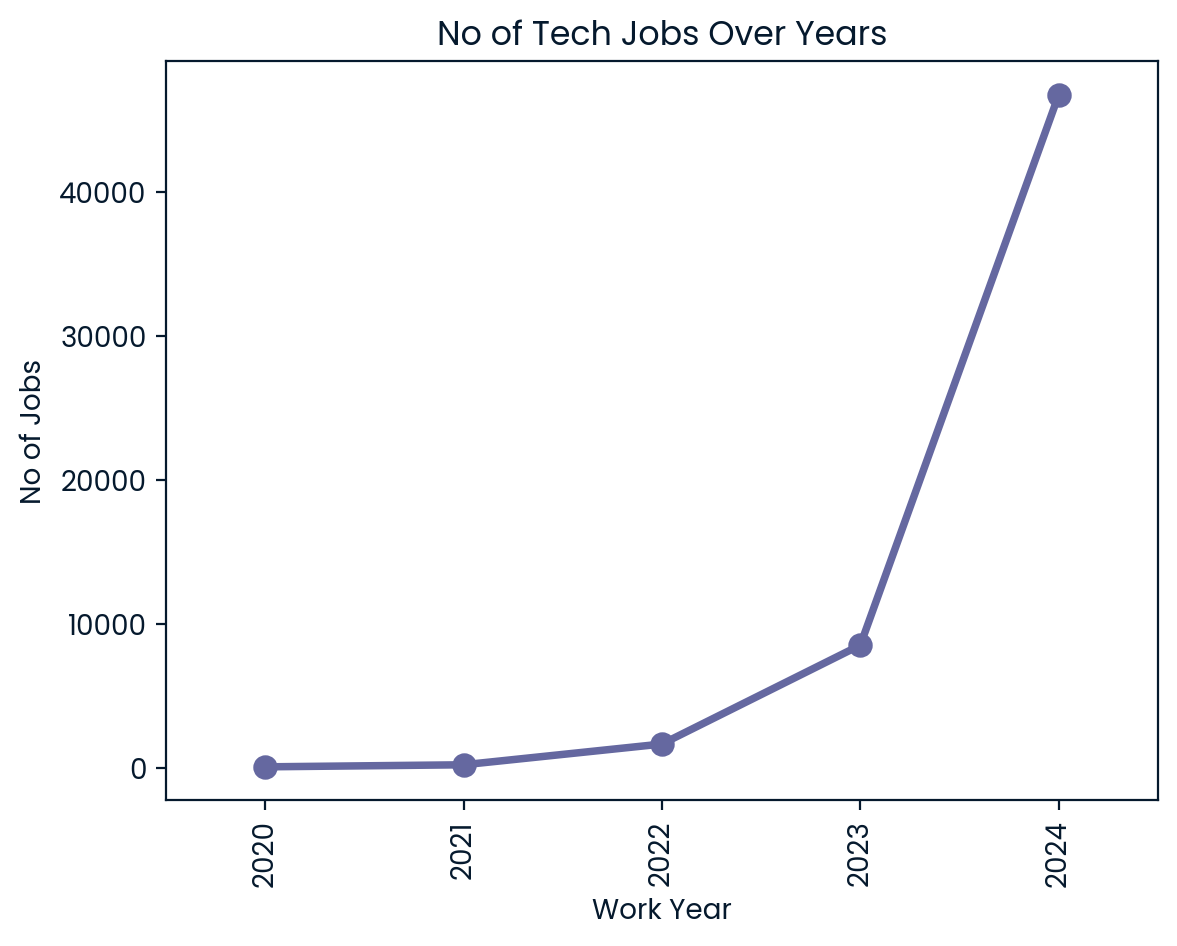

In [198]:
employee_count = df.groupby('work_year').size().reset_index(name='count_of_employees')
sns.pointplot(data=employee_count, x='work_year', y = 'count_of_employees')
plt.xticks(rotation = 90)
plt.ylabel('No of Jobs')
plt.xlabel('Work Year')
plt.title('No of Tech Jobs Over Years');

Job opportunities remained relatively low from 2020 to 2022, showing only a gradual increase. The number of jobs started to increase more rapidly in 2023, marking a turning point for the industry.The most striking trend is the massive spike in 2024, where job openings quadrupled compared to previous years.

This rapid growth is likely driven by increased reliance on tech solutions, AI advancements, and a growing demand for data-driven roles. Data Scientists and Data Analysts dominating the job market. Data Engineers and Software Engineers also hold strong positions, reflecting the critical need for data infrastructure and software development. Meanwhile, Machine Learning Engineers and Managers see lower but notable demand, while Consultants appear to have the least job opportunities

In [199]:
df_2024= df[df['work_year'] == 2024]

In [200]:
job_category_2024 = df_2024['job_category'].value_counts(normalize = True).reset_index()
job_category_2024

,job_category,proportion
0,Data_Scintist,0.191931
1,Data_Analyst,0.174700
2,Data_Engineer,0.149551
3,SW_Engineer,0.147838
4,Other,0.141053
5,ML_Engineer,0.108947
6,Manager,0.079195
7,Consultant,0.006785


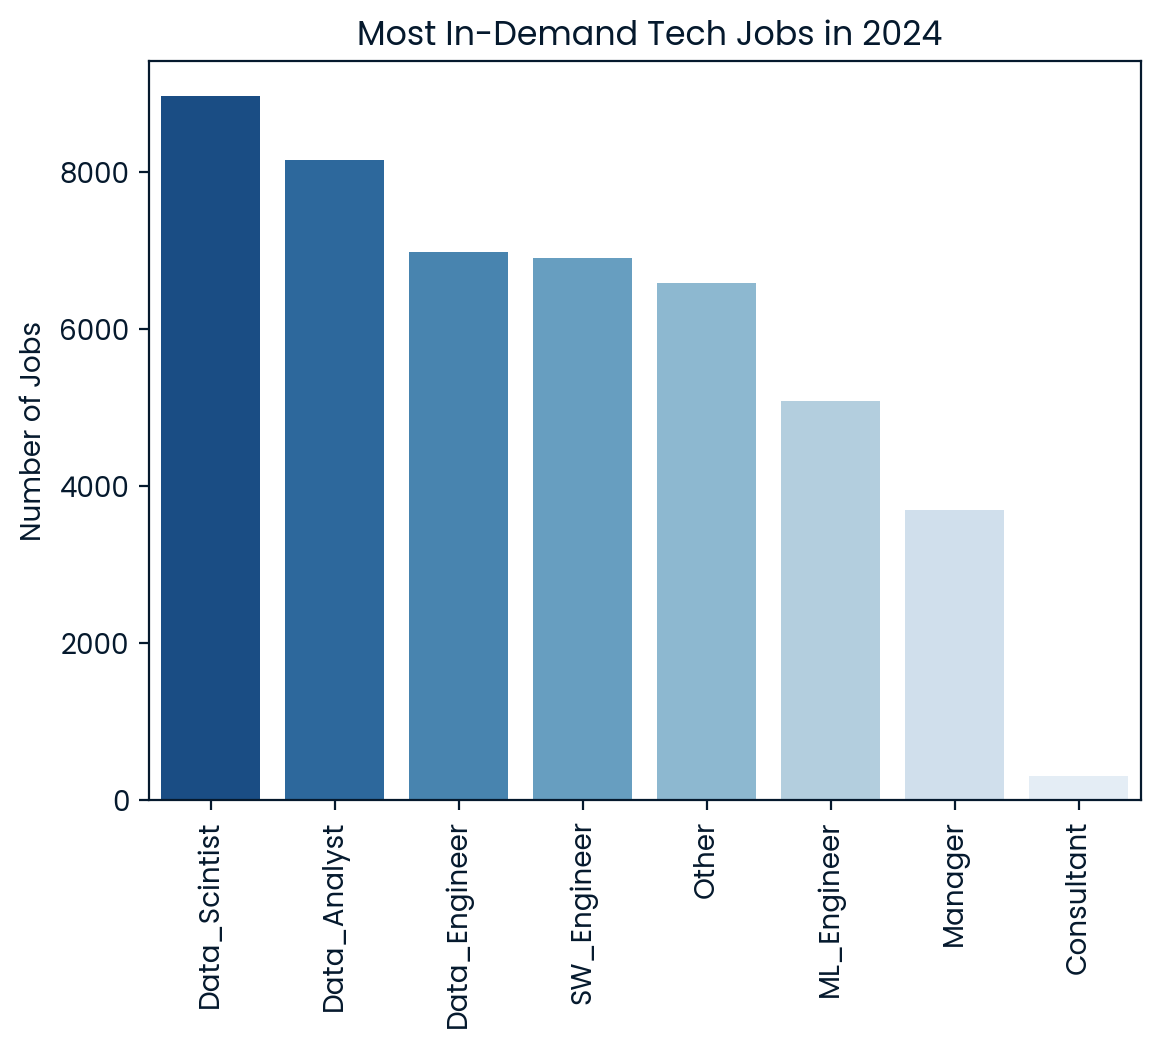

In [201]:
sns.countplot(data = df_2024, x ='job_category' , 
              order = job_category_2024['job_category'],
             palette= 'Blues_r')
plt.xticks(rotation = 90),
plt.title(' Most In-Demand Tech Jobs in 2024')
plt.xlabel('')
plt.ylabel('Number of Jobs');

## Tech Salaries on the Rise: A Five-Year Growth Trend

As seen in the job opportunities graph, the number of tech jobs has skyrocketed. This correlates directly with the salary increase shown in this graph, as companies compete for top talent. The significant rise in salaries post-2021 by 34.3 % reflects the high demand for skilled professionals, pushing employers to offer more competitive compensation to attract and retain employees in an expanding market.

In [202]:
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
#add growth percentage
avg_salary_by_year["growth (%)"] = avg_salary_by_year["salary_in_usd"].pct_change() * 100
avg_salary_by_year["growth (%)"] = avg_salary_by_year["growth (%)"].fillna("-")
avg_salary_by_year

,work_year,salary_in_usd,growth (%)
0,2020,102250.866667,-
1,2021,99922.073394,-2.277529
2,2022,134183.903556,34.28855
3,2023,153700.755456,14.544853
4,2024,161488.267616,5.066671


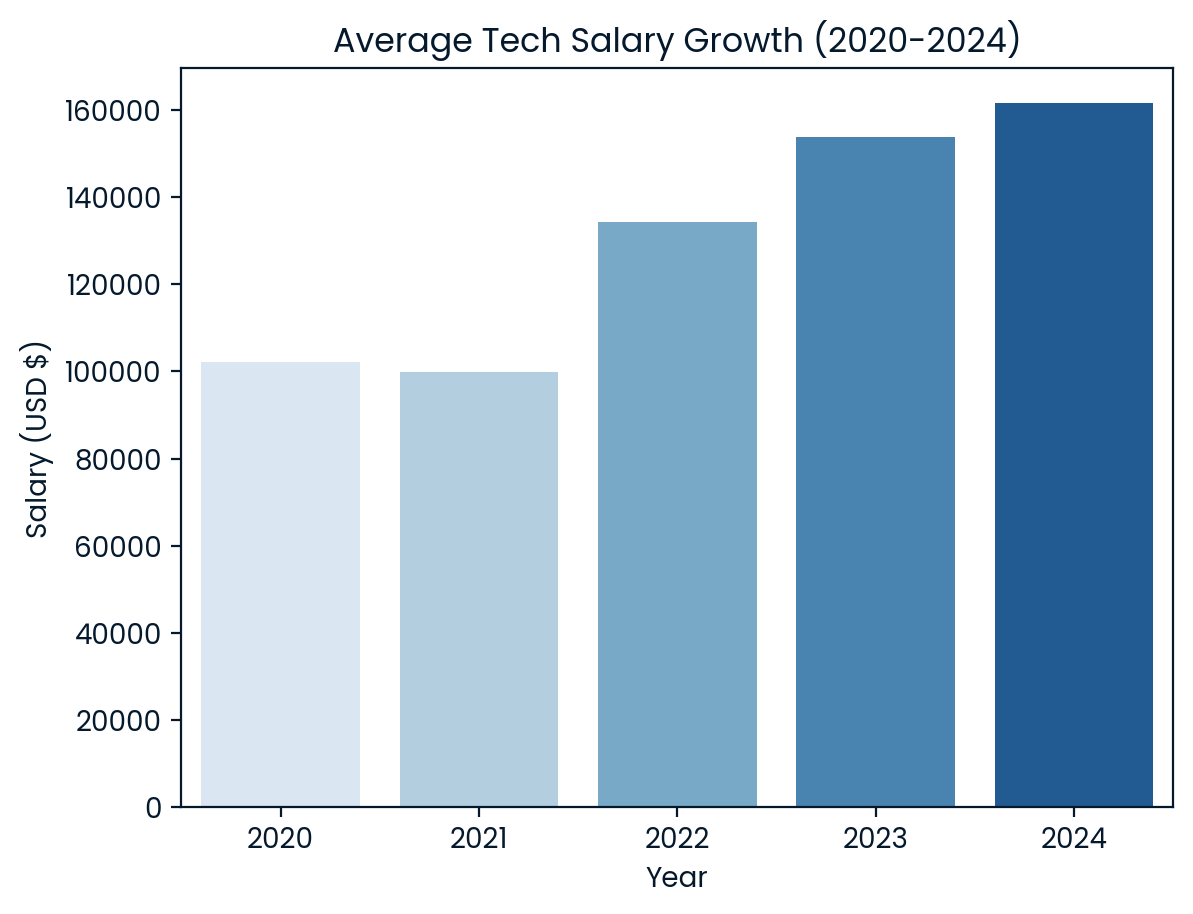

In [203]:
sns.barplot(data = df, x = 'work_year', y = 'salary_in_usd', estimator = 'mean', ci = None, palette = 'Blues')
plt.ylabel('Salary (USD $)')
plt.xlabel('Year')
plt.title('Average Tech Salary Growth (2020-2024)');

## 💰 The Highest-Paying Job Titles & Categories in 2024 – Who’s Leading the Salary Race?

Head of Machine Learning and Applied AI ML Lead leading the pack with salaries exceeding $300K. Engineering roles, particularly Engineering Managers and ML Performance Engineers, also command high compensation. Leadership positions in AI, such as Head of AI and Director of Machine Learning, continue to see strong salary packages, reflecting the increasing demand for AI expertise.

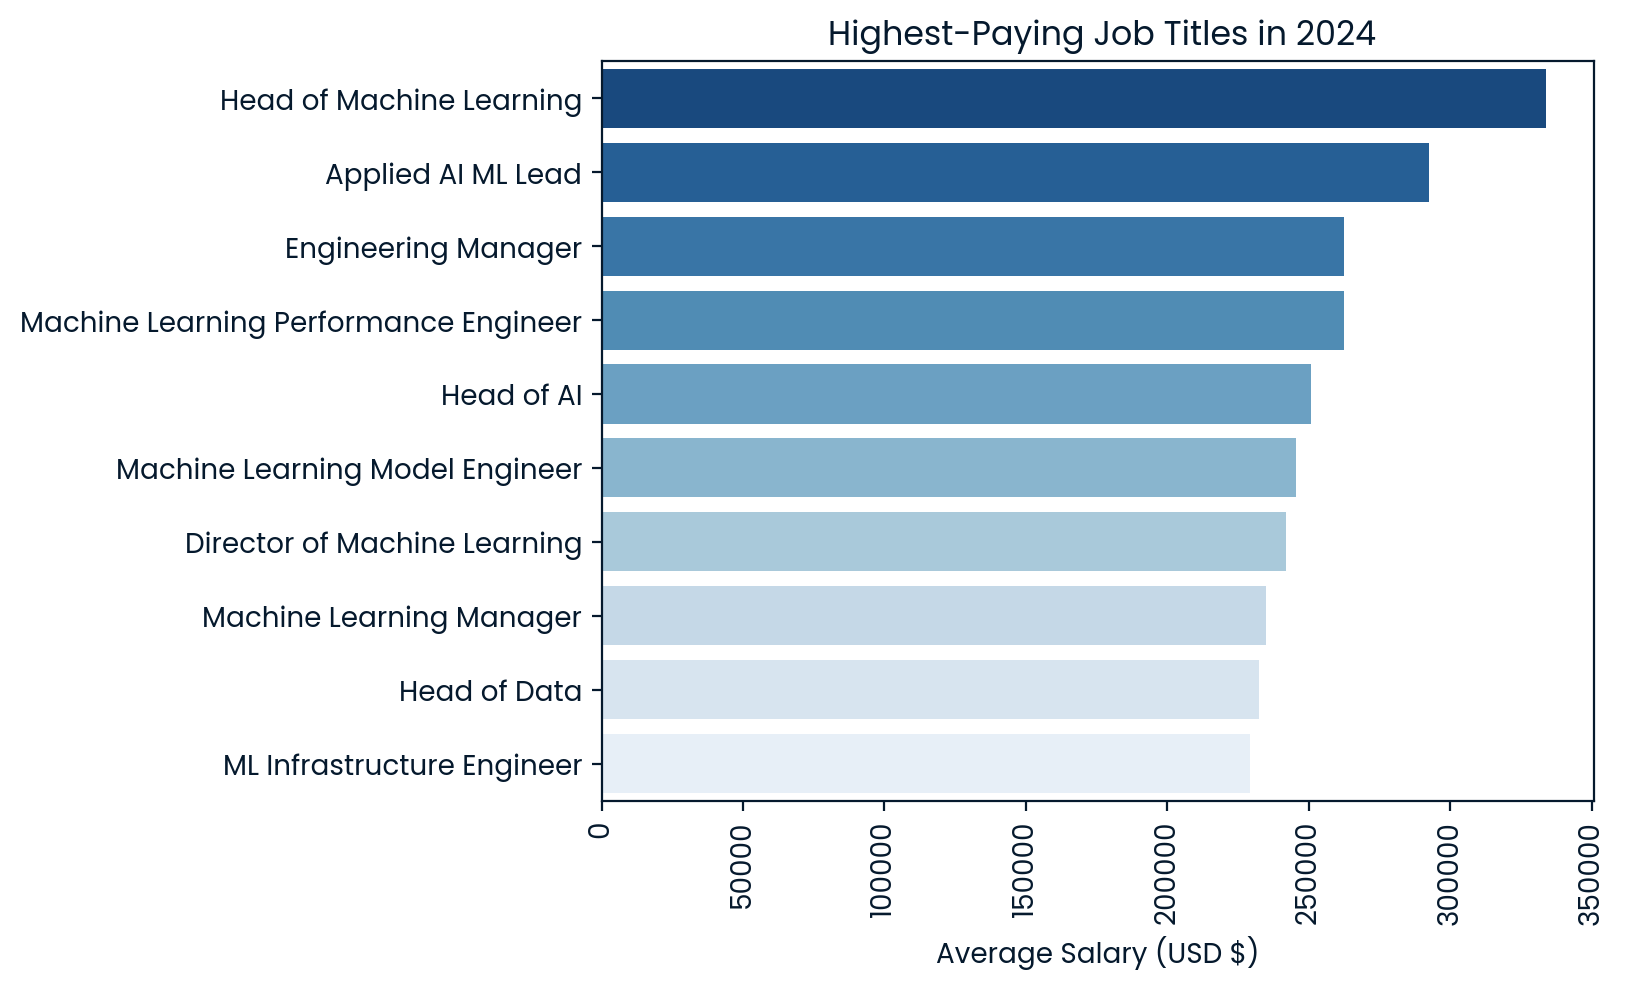

In [204]:
top_10_job_title = df_2024.groupby('job_title')['salary_in_usd'].mean().nlargest(10).reset_index()
sns.barplot(data =top_10_job_title , y = 'job_title', x = 'salary_in_usd', orient = 'h', palette='Blues_r')

plt.title(' Highest-Paying Job Titles in 2024')
plt.xlabel('Average Salary (USD $)')
plt.ylabel('')
plt.xticks(rotation = 90);

The Machine Learning Engineer (ML Engineer) role stands out as the highest-paying job category in 2024, reinforcing the trend observed in top-paying job titles where AI and ML leadership dominated. Software Engineers and Managers also command strong salaries, showcasing the high demand for engineering and leadership expertise. Data Scientists and Data Engineers continue to be well-compensated, while Data Analysts and Consultants rank lower in comparison.

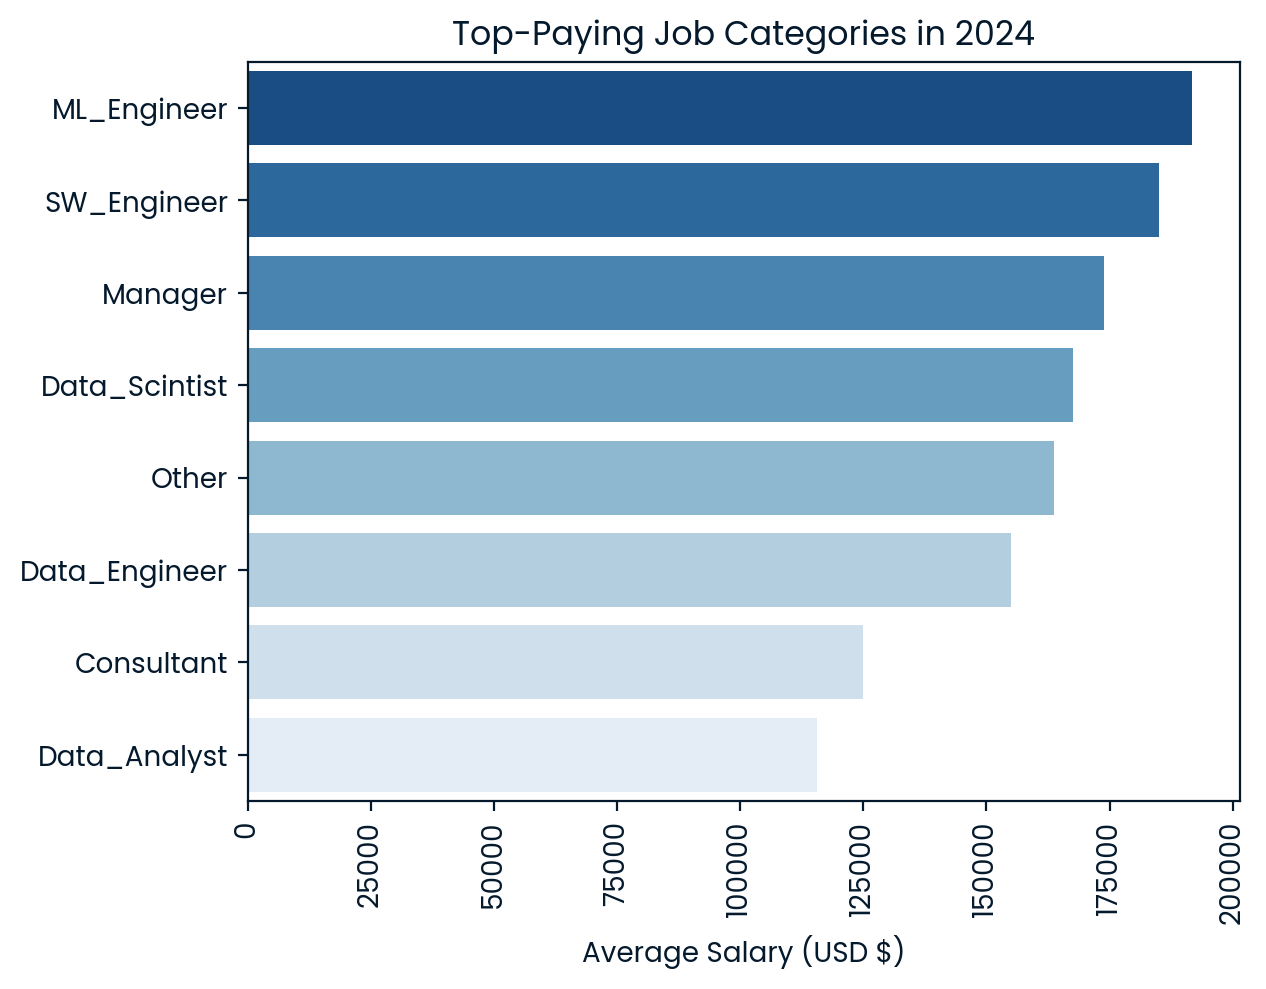

In [205]:
avg_salary_by_job_category = df_2024.groupby('job_category')['salary_in_usd'].mean().reset_index().sort_values(by = 'salary_in_usd',
                                                        ascending = False)
sns.barplot(data = avg_salary_by_job_category, y = 'job_category', 
            x = 'salary_in_usd', errorbar = None, palette = 'Blues_r',
           orient = 'h')
plt.title('Top-Paying Job Categories in 2024')
plt.ylabel('')
plt.xlabel('Average Salary (USD $)')
plt.xticks(rotation = 90);

##  Salary Trends Across Employment Types (2020-2024) 💰
Companies offer different employment types to optimize costs, flexibility, and workforce needs. The four common types—Full-time, Part-time, Contract, and Freelance—serve different business goals and employee preferences.
Ultimately, companies balance cost and expertise, while workers choose between stability and flexibility. 

In [206]:
df['employment_type'].value_counts(normalize = True)

employment_type
FT    0.996171
PT    0.001976
CT    0.001574
FL    0.000280
Name: proportion, dtype: float64

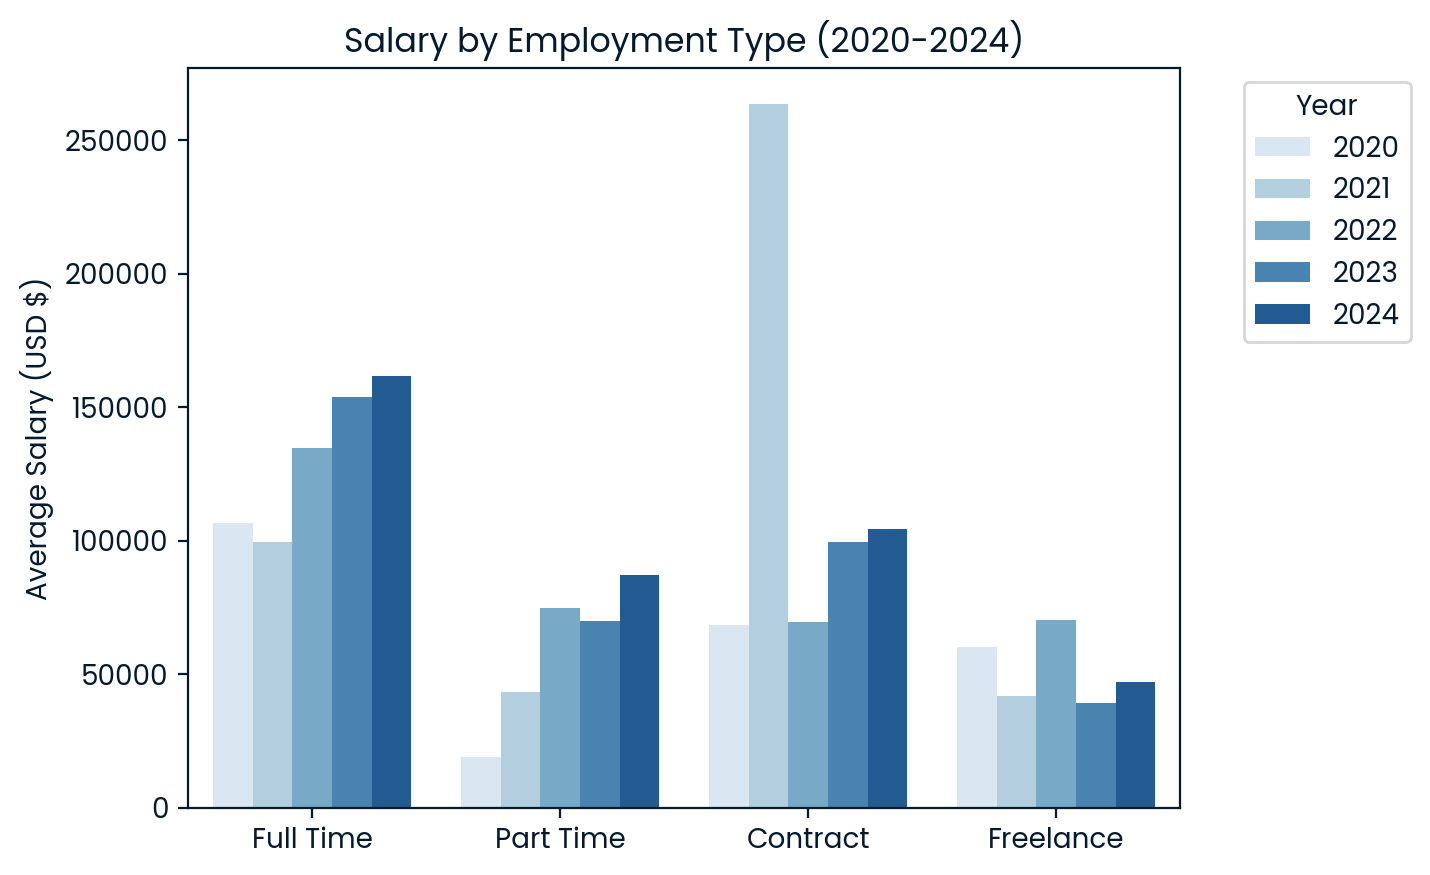

In [207]:
custom_palette = sns.color_palette("Blues", n_colors=5)
sns.barplot(data = df, 
            x= 'employment_type', 
            y = 'salary_in_usd',
            hue = 'work_year',
            errorbar = None, 
            estimator= 'mean', 
            palette=custom_palette)

plt.legend(title='Year',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Salary by Employment Type (2020-2024)')
plt.ylabel('Average Salary (USD $)')
plt.xlabel('')
plt.xticks(['FT', 'PT', 'CT', 'FL'],['Full Time', 'Part Time', 'Contract', 'Freelance']);

- Full-time employment remains the most lucrative and stable career choice, showing continuous salary growth.
- Part-time employment has experienced steady growth, though it remains significantly lower than full-time positions.
- Contract roles show extreme salary spikes in certain years (notably 2021), indicating potential high-paying (for Specialized Skills) but less predictable opportunities.
- Freelance salaries remain the lowest, with minimal fluctuations, possibly due to variable work availability and project-based pay structures.

## 🌍 Global Salary Trends: Top 10 Company Locations Over Time 

As the job market evolves, salaries across different countries fluctuate, reflecting economic trends, industry demands, and regional growth.

This analysis uncovers the top-paying company locations over the past five years.

- **United Kingdom** stands out as the only country consistently appearing in the top 10 company locations by average salary across all five years.
- 2023 saw a record-breaking salary peak, with the maximum average salary reaching 300K USD, a significant jump compared to previous years, where no location exceeded 200K USD.
- In 2024, salary distribution across the top 10 locations is more uniform, with a narrow gap between the highest and lowest average salaries, indicating a more balanced global pay scale.

In [208]:
import plotly.express as px
import plotly.graph_objects as go

# Calculate the average salary in USD for each company location and work year
avg_salary_by_location_year = df.groupby(['company_location', 'work_year'])['salary_in_usd'].mean().reset_index()

# Get the top 10 company locations by average salary for each year
top_10_avg_salary_by_year = avg_salary_by_location_year.groupby('work_year').apply(lambda x: x.nlargest(10, 'salary_in_usd')).reset_index(drop=True)

top_10_avg_salary_by_year

fig = px.bar(
    data_frame=top_10_avg_salary_by_year,
    x='company_location',
    y='salary_in_usd',
    animation_frame='work_year',
    color='salary_in_usd',  # Use 'salary_in_usd' for color scaling
    color_continuous_scale='Blues',
    title='Top 10 Company Locations by Average Salary Over Time'
)

fig.update_layout(
    yaxis=dict(range=[0, 300000]), # Set y-axis limit to 300K
    
     xaxis_title=None,  # Remove x-axis label
     yaxis_title=None,   # Remove y-axis label
    
    updatemenus=[{
        'buttons': fig.layout.updatemenus[0].buttons,
        'direction': 'down',
        'x': 0.0,
        'xanchor': 'left',
        'y': -0.4,
        'yanchor': 'top'
                }],
    
    coloraxis=dict(
                   colorbar=dict(
                    title='Avg Salary (USD $))'
                    ),
                    cmin=0,  # Minimum value for color scale
                    cmax=300000  # Maximum value for color scale
                    )
)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000  # Set duration to 2000ms (2 seconds) per frame


# Show the figure
fig.show()

## 📈 How Experience and Company Size Shape Your Paycheck!

Does experience guarantee a higher salary? Does working at a large company mean bigger paychecks? 
let's explores how experience level (from entry-level to executive) and company size (small, medium, and large) impact salary trends. Understanding these dynamics can help professionals make strategic career choices and maximize earnings.


#### How Seniority Impacts Salary Growth in Tech

Salary is not just a reflection of job title or company size—it is heavily influenced by seniority level. As professionals progress from **entry-level (EN)** to **mid-level (MI)**, **senior (SE)**, and **expert (EX)** roles, their earning potential increases significantly.

The data shows a clear upward trend in salaries with experience, with senior and expert professionals commanding the highest pay. Additionally, the salary gap between junior and senior roles has widened in recent years, highlighting the growing demand for experienced talent.


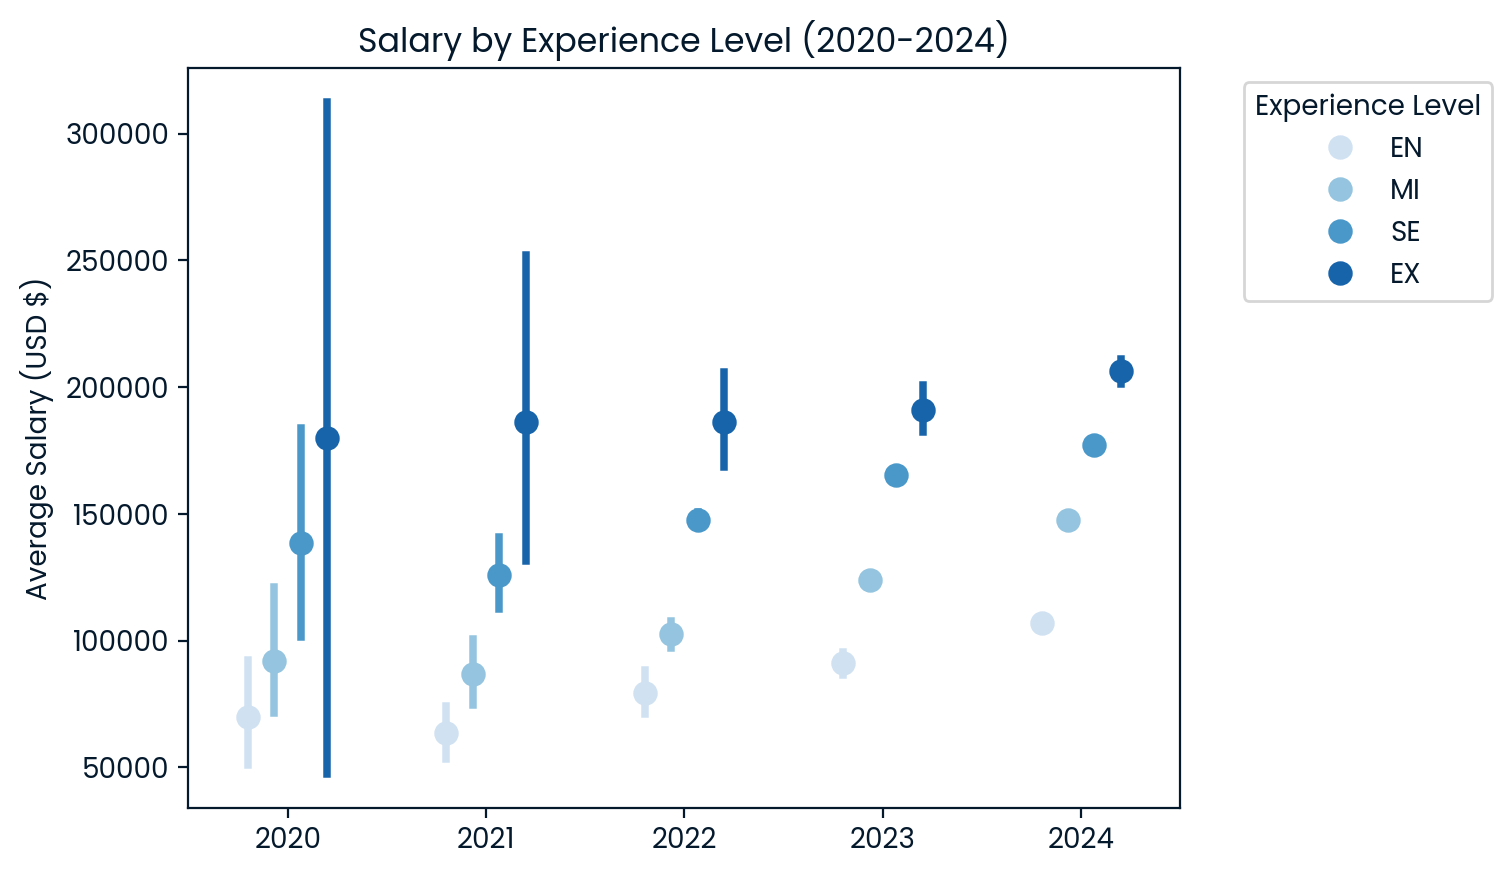

In [209]:
sns.pointplot(data = df, x = 'work_year', y= 'salary_in_usd', hue = 'experience_level',
               hue_order=['EN', 'MI', 'SE', 'EX'],linestyles = '', palette = 'Blues', dodge = 0.4,)
plt.legend(title='Experience Level',bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.yscale('log');
plt.title('Salary by Experience Level (2020-2024)')
plt.xlabel("")
plt.ylabel('Average Salary (USD $)');

There is a clear positive correlation between experience level and salary (**Higher Experience** = **Higher Salaries**) .

The salary growth is more significant for Senior (SE) and Mid-Level (MI) levels, indicating increasing demand for highly skilled professionals.
Widening Salary Gap Between Experience Levels

Expert level (EX) salaries showing low growth but the error bars represent larger variability, especially in earlier years (2020-2021).This indicates a wide range of salaries for senior roles, likely due to variations in industry, job function, and company size.However, as the years progress, variability decreases, suggesting more standardized salary trends for senior professionals.

The gap between entry-level (EN) and Mid-Level (MI) salaries has widened over the years. In 2020, some entry-level roles had salaries approaching mid-level (MI) roles, but by 2024, there is a clear distinction between each level. This suggests that companies are willing to pay significantly more for expertise and leadership in recent years.

Entry-level (EN) salaries show the least variability and remain significantly lower than other levels.This indicates that junior roles have more predictable pay ranges, while salaries for experienced professionals vary based on negotiation power, industry demand, and specialization.

#### How Company Size Shapes Salary Trends

While experience is a key factor in determining salaries, it is far from the only one. Company size plays a crucial role in shaping compensation structures, with larger organizations often offering higher salaries, better benefits, and more structured career growth opportunities. Startups and smaller firms, on the other hand, may provide competitive salaries but often compensate with equity, flexibility, or unique perks.

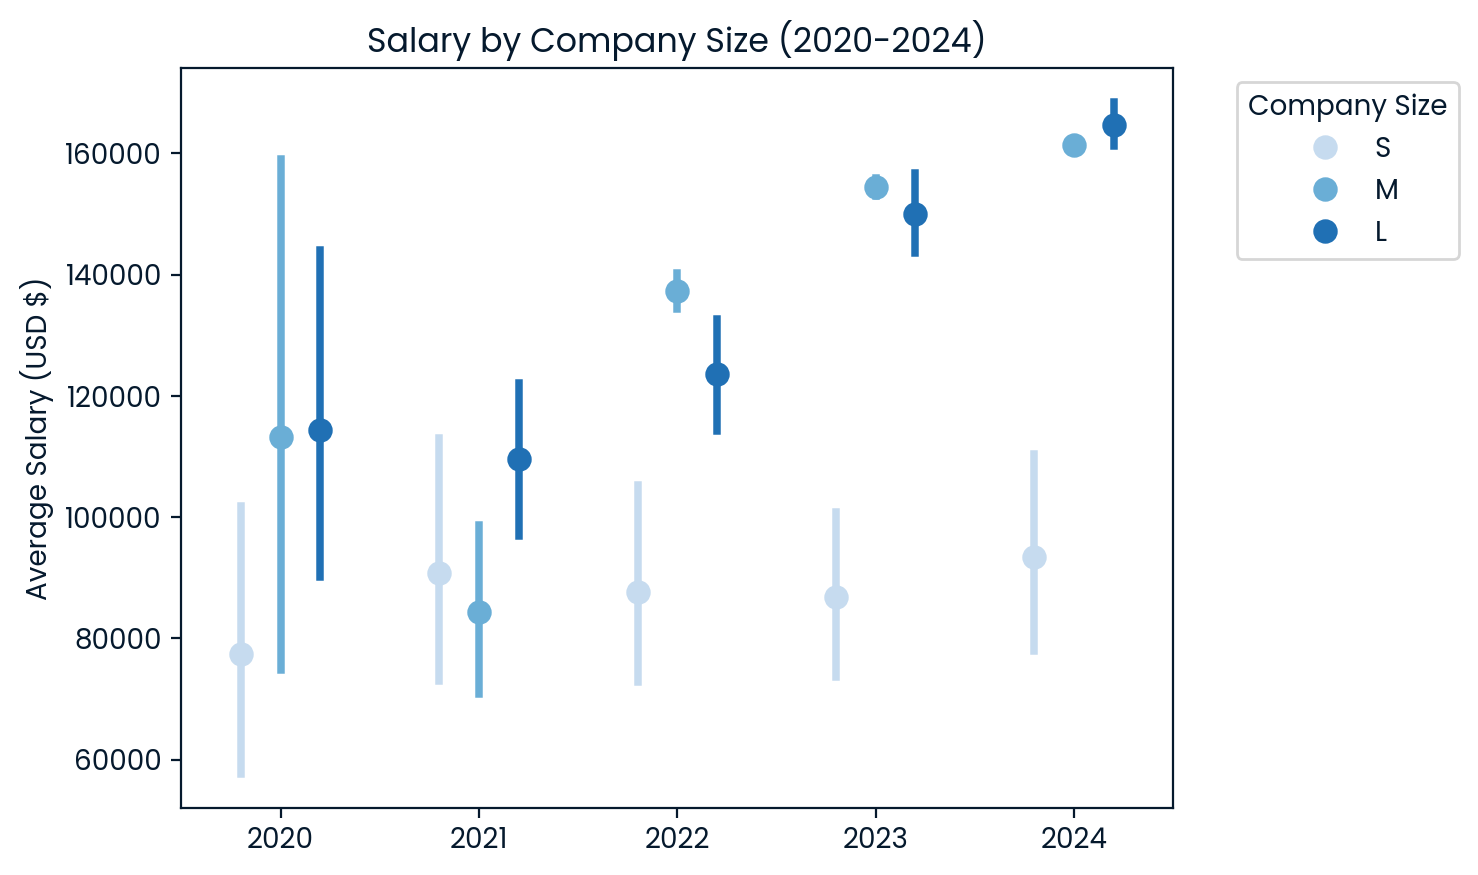

In [210]:
sns.pointplot(data = df, 
              x = 'work_year', 
              y= 'salary_in_usd', 
              hue = 'company_size',
            hue_order=['S', 'M', 'L'],
              linestyles = '', 
              palette = 'Blues',
              dodge = 0.4,)
plt.legend(title='Company Size',bbox_to_anchor=(1.05, 1), loc='upper left')
;
#plt.yscale('log')
plt.title('Salary by Company Size (2020-2024)')
plt.xlabel("")
plt.ylabel('Average Salary (USD $)');

Across all years, large companies (L) consistently offer higher median salaries than medium (M) and small (S) companies.
The salary gap between company sizes is especially evident in recent years (2022–2024), where large firms show the highest pay.

The error bars indicate salary variability (range of salaries within each category).
In 2020 and 2021, salaries in small and medium companies showed more fluctuation, suggesting less stability in compensation.
In contrast, large companies show more consistent salary trends, especially in recent years.

While medium and large firms show a clear upward trend, small companies (S) seem to have stagnated at lower salary ranges, particularly from 2022 onwards.
This could indicate that small firms struggle to compete with larger firms in salary offerings, potentially making talent retention harder.

#### 2024 Salary Breakdown on Experience & Company Size

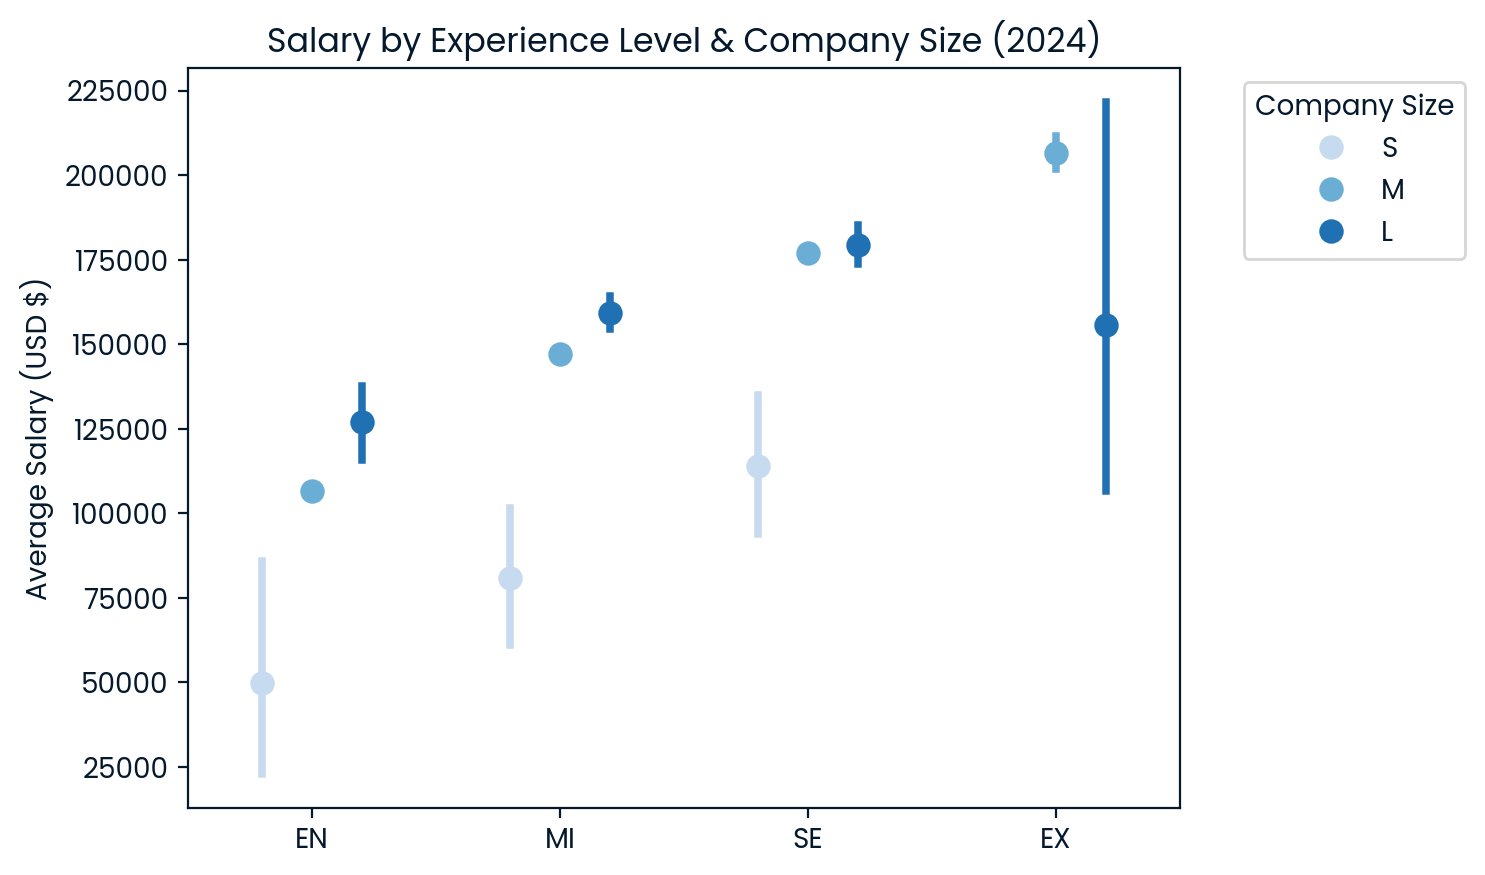

In [211]:
sns.pointplot(data = df_2024, 
              x = 'experience_level',
              y= 'salary_in_usd',
              order=['EN', 'MI', 'SE', 'EX'],
              hue = 'company_size',
                hue_order=['S', 'M', 'L'],
              linestyles = '', 
              palette = 'Blues', 
              dodge = 0.4,)
plt.legend(title='Company Size',bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Salary by Experience Level & Company Size (2024)')
plt.xlabel("")
plt.ylabel('Average Salary (USD $)');

- Small companies (S) offer the lowest salaries across all experience levels, with high variability, indicating that skill level and negotiation power significantly impact earnings.
- Large companies (L) consistently provide the highest salaries across all experience levels, followed by medium-sized companies (M).
- Mid (MI) and Senior (SE) level employees see minimal salary differences between medium and large companies, suggesting intense competition to attract skilled professionals.
- Executive-level (EX) salaries show the highest variance, particularly in large companies, indicating greater earning potential but also increased unpredictability in compensation.

This analysis underscores the importance of both experience and company size in salary progression, helping professionals and job seekers align their career strategies for maximum financial growth. 

In [212]:
df_2024.groupby(['experience_level', 'company_size'])['salary_in_usd'].median()

experience_level  company_size
EN                L               103998.5
                  M                93500.0
                  S                27777.0
EX                L               128333.0
                  M               200000.0
MI                L               136000.0
                  M               135830.0
                  S                70000.0
SE                L               165600.0
                  M               166000.0
                  S               114375.0
Name: salary_in_usd, dtype: float64

## Remote Work Choices and Salary Impact
Remote work has experienced a dynamic shift, from rapid adoption during the pandemic to a gradual return to onsite work. Companies initially embraced remote and hybrid models to maintain operations, but as the job market evolved, many organizations reconsidered their approach. While remote work provides flexibility and access to global talent, some companies argue that onsite collaboration enhances productivity and innovation. 

This shift directly impacts salaries, with remote jobs often offering location-based pay adjustments and hybrid roles maintaining competitive wages.

In [213]:
#compare remote work ratio based on its percentage for each year
remote_df = df.groupby(['work_year', 'remote_ratio']).size().reset_index()
remote_df.columns = ['work_year', 'remote_ratio', 'number_of_employee']
remote_df['total_employees'] = remote_df.groupby('work_year')['number_of_employee'].transform('sum')
remote_df['percentage'] = remote_df['number_of_employee'] / remote_df['total_employees']*100
remote_df

,work_year,remote_ratio,number_of_employee,total_employees,percentage
0,2020,0,18,75,24.000000
1,2020,50,21,75,28.000000
2,2020,100,36,75,48.000000
3,2021,0,29,218,13.302752
4,2021,50,73,218,33.486239
5,2021,100,116,218,53.211009
6,2022,0,709,1659,42.736588
7,2022,50,63,1659,3.797468
8,2022,100,887,1659,53.465943
9,2023,0,5775,8522,67.765783


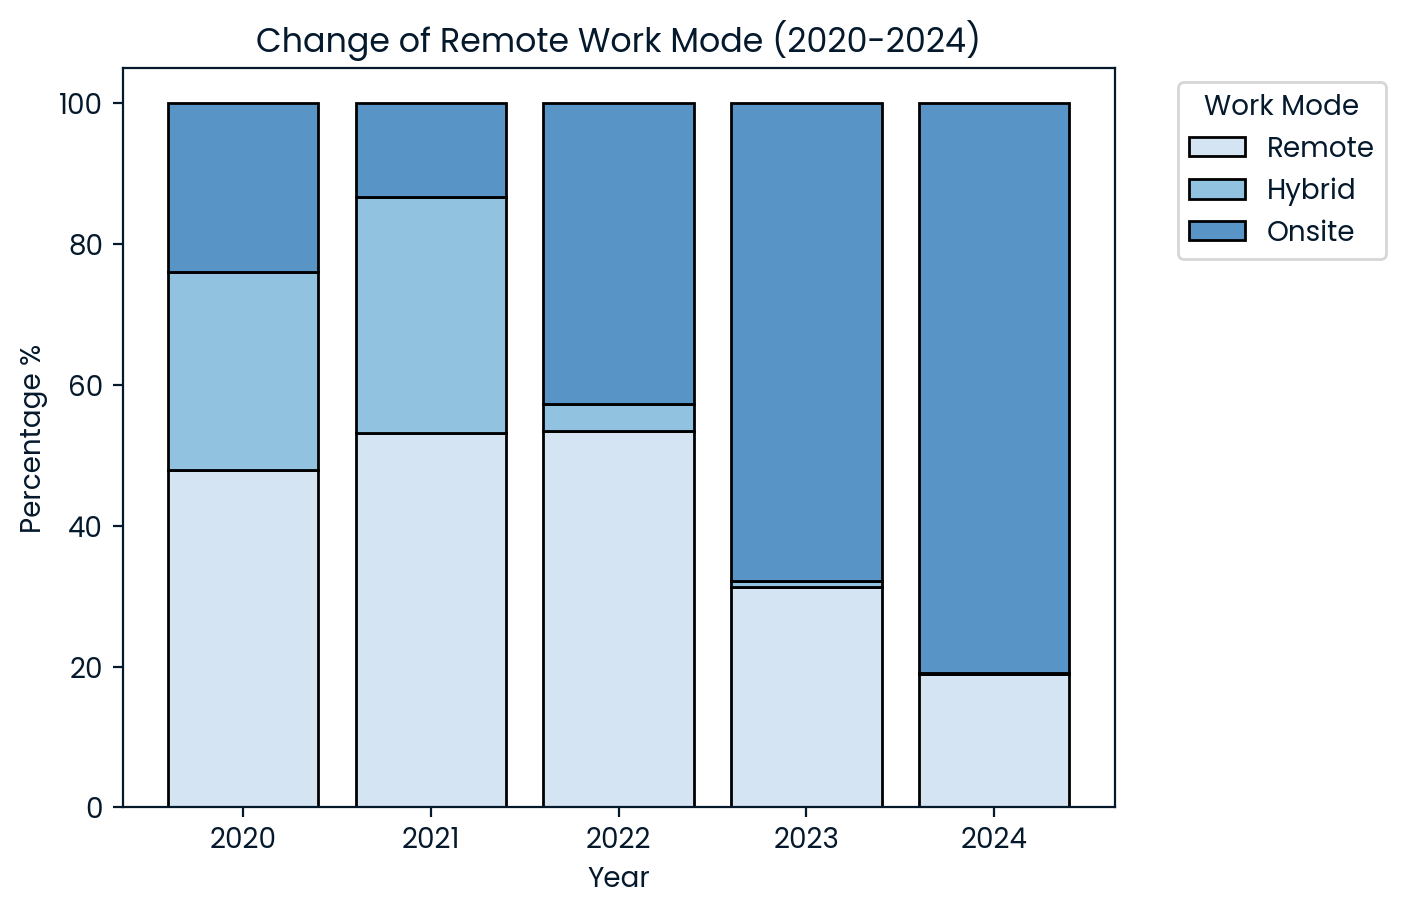

In [214]:
# Define a custom palette that does not start from white
custom_palette = sns.color_palette("Blues_r", n_colors=3)

# Plot the histogram with the custom palette
sns.histplot(
    data=remote_df,
    x='work_year', 
    hue='remote_ratio',
    weights='percentage',
    multiple='stack', 
    discrete=True, 
    shrink=.8,
    palette=custom_palette
)

# Update the legend with labels
plt.legend(title='Work Mode', labels=['Remote', 'Hybrid', 'Onsite'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Percentage %')
plt.xlabel('Year')
plt.title('Change of Remote Work Mode (2020-2024)')
plt.show()

- Remote work was dominant in 2020 and 2021, with hybrid and onsite models gradually increasing.
- 2022 marked a turning point, with a significant decline in hybrid roles and a rise in onsite work while remote role percentage didn't change.
- By 2023 and 2024, onsite work became the majority, suggesting a shift in companies preferences.

Salaries in remote roles may face standardization or reductions, while onsite jobs may regain negotiating power, particularly in competitive markets.

#### Remote, Hybrid, or Onsite: Which Pays the Most in 2024?

- Onsite roles generally offer the highest salaries, especially for machine learning engineers and mangerial positions.
- Remote and onsite salaries for Data Analysts and Data Scientists show negligible differences
- Machine Learning and Software Engineers have the highest earning potential, regardless of work mode.
- Hybrid roles tend to have the lowest pay

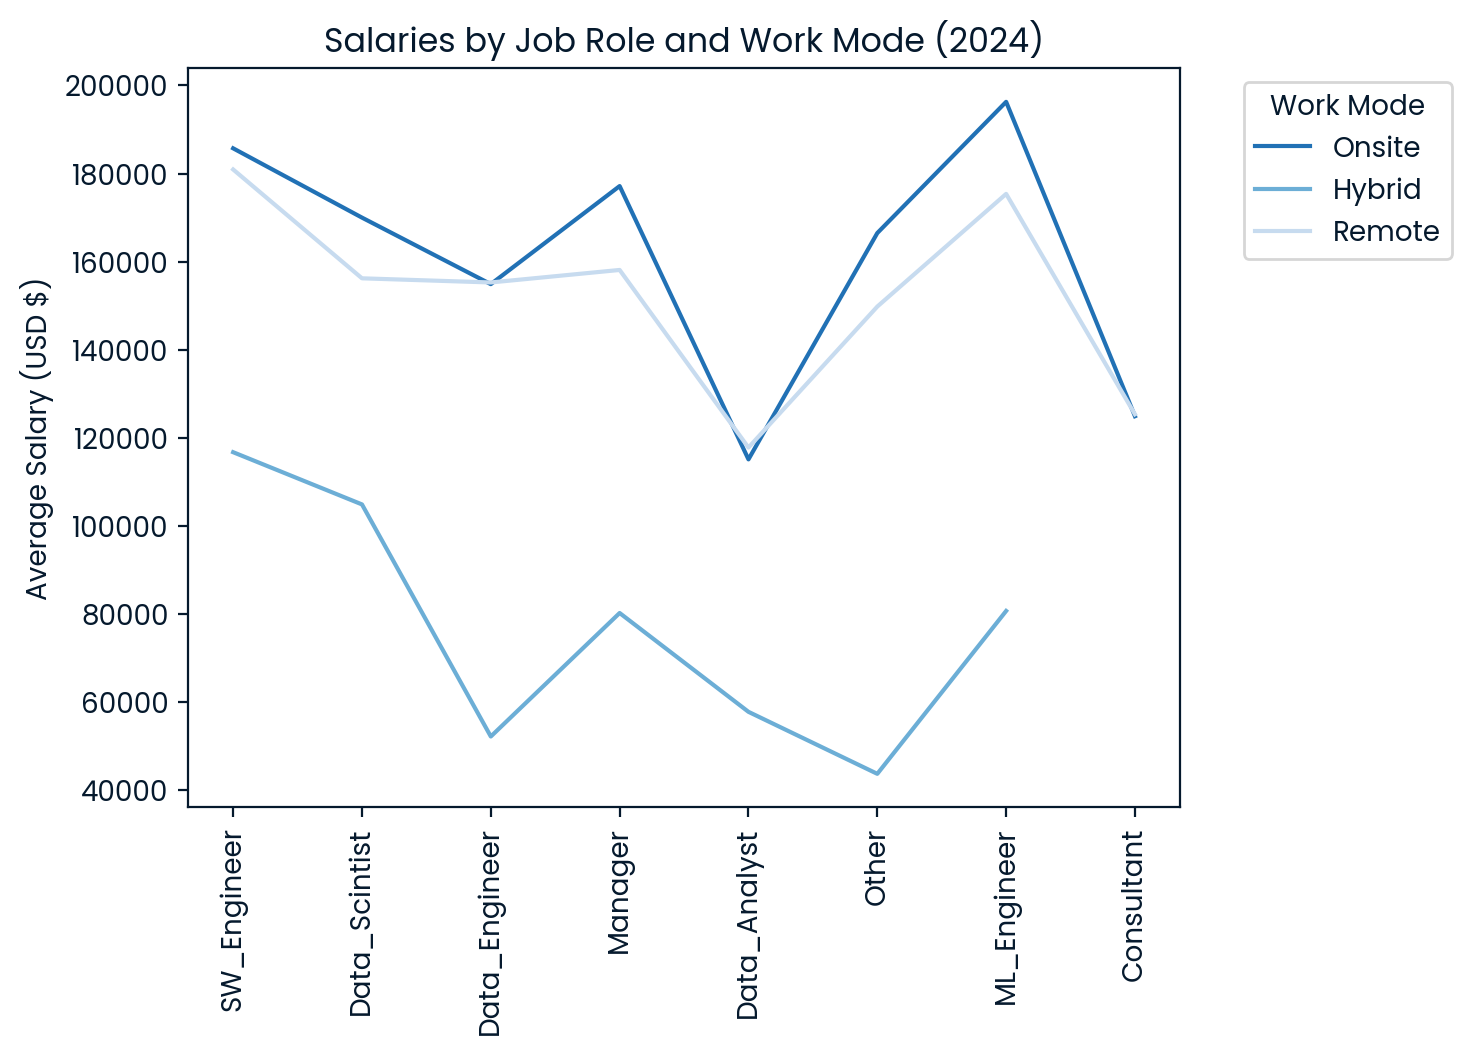

In [215]:
custom_palette = sns.color_palette("Blues_r", n_colors=3)

sns.lineplot(data = df_2024, 
             x = 'job_category', 
             y = 'salary_in_usd', 
             hue='remote_ratio', 
             errorbar = None, 
             estimator= 'mean',
            palette= custom_palette)

plt.legend(title='Work Mode', labels=['Onsite', 'Hybrid', 'Remote'], bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.legend(title='Company Size',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('Average Salary (USD $)')
plt.title('Salaries by Job Role and Work Mode (2024)');

# Craeting Model to Predict Salary in USD

In [216]:
import numpy as np

# Import train_test_split
from sklearn.model_selection import train_test_split

#import scaling and ordinal encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer


#import linera models
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

#import dt models
from sklearn.tree import DecisionTreeRegressor

#import ensamble and xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

#import mertic
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score, mean_absolute_error

In [217]:
df_model = df_2024.copy()

## `1- ` Check Normality
- Check Normality for our target variable (salary_in_usd)

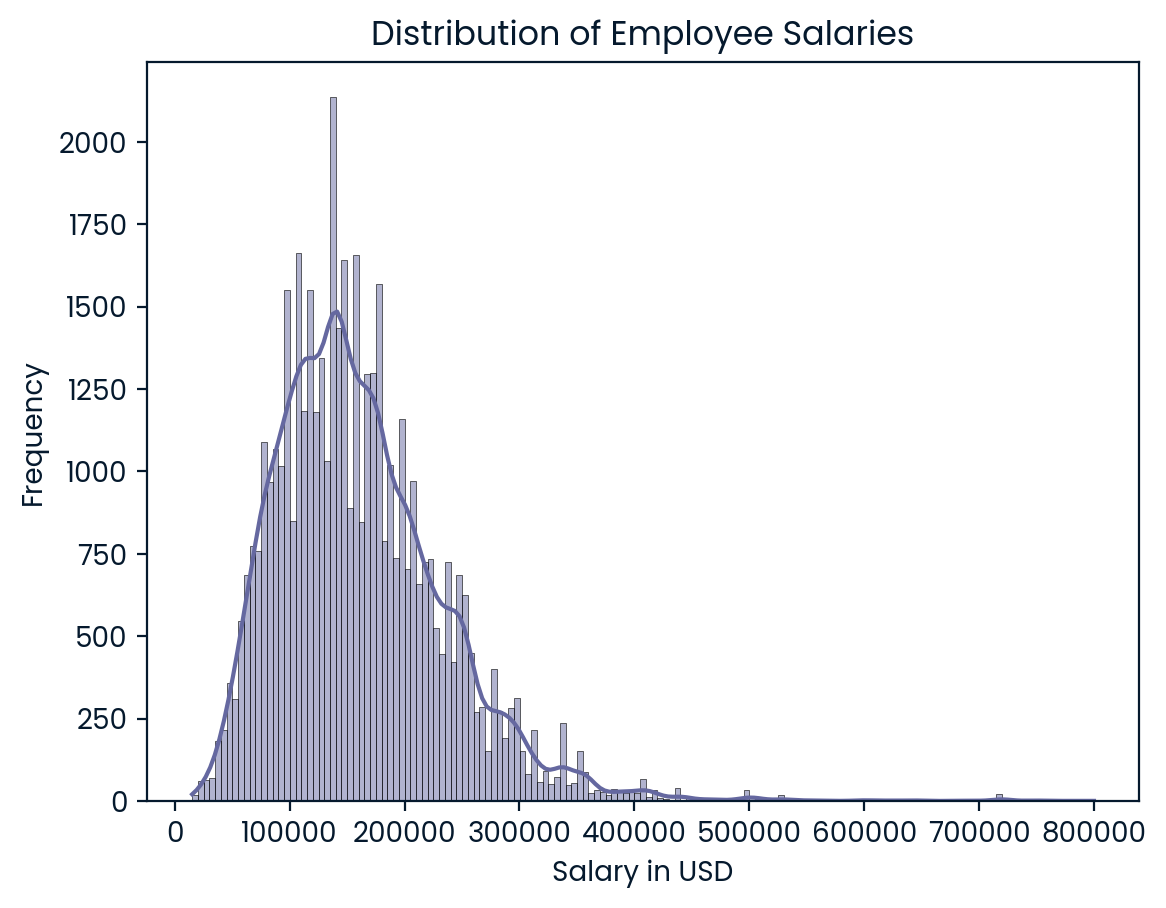

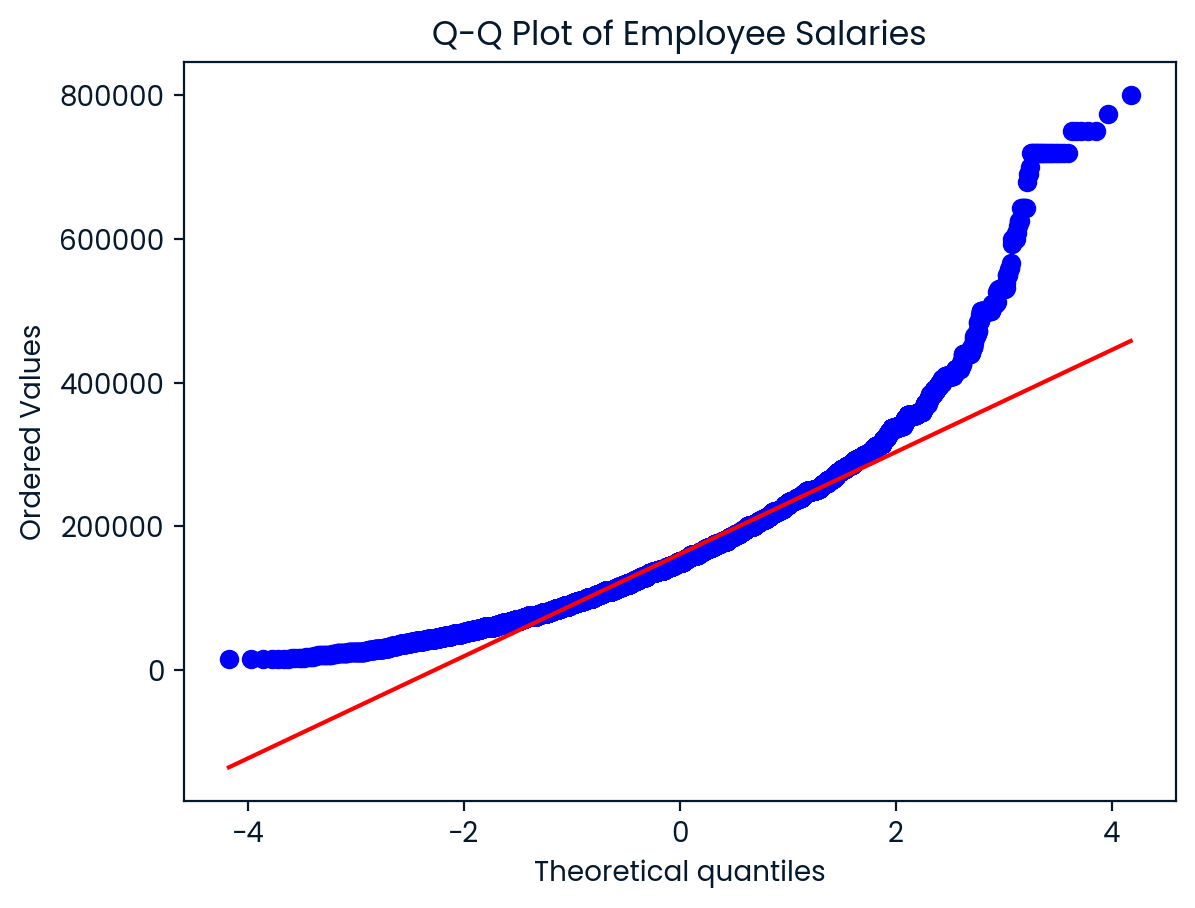

In [218]:
from scipy import stats
# Visualize the distribution using a histogram
#plt.figure(figsize=(8, 6))
sns.histplot(df_model['salary_in_usd'], kde=True)
plt.title('Distribution of Employee Salaries')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

# Create a Q-Q plot to check for normality
#plt.figure(figsize=(8, 6))
stats.probplot(df_model['salary_in_usd'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Employee Salaries')
plt.show()

The salary distribution (salary_in_usd) exhibits right-skewness, indicating that it is not normally distributed. Since linear models—such as Linear Regression, Lasso, and Ridge—assume a normally distributed target variable, applying a log transformation is necessary to stabilize variance and improve model performance.

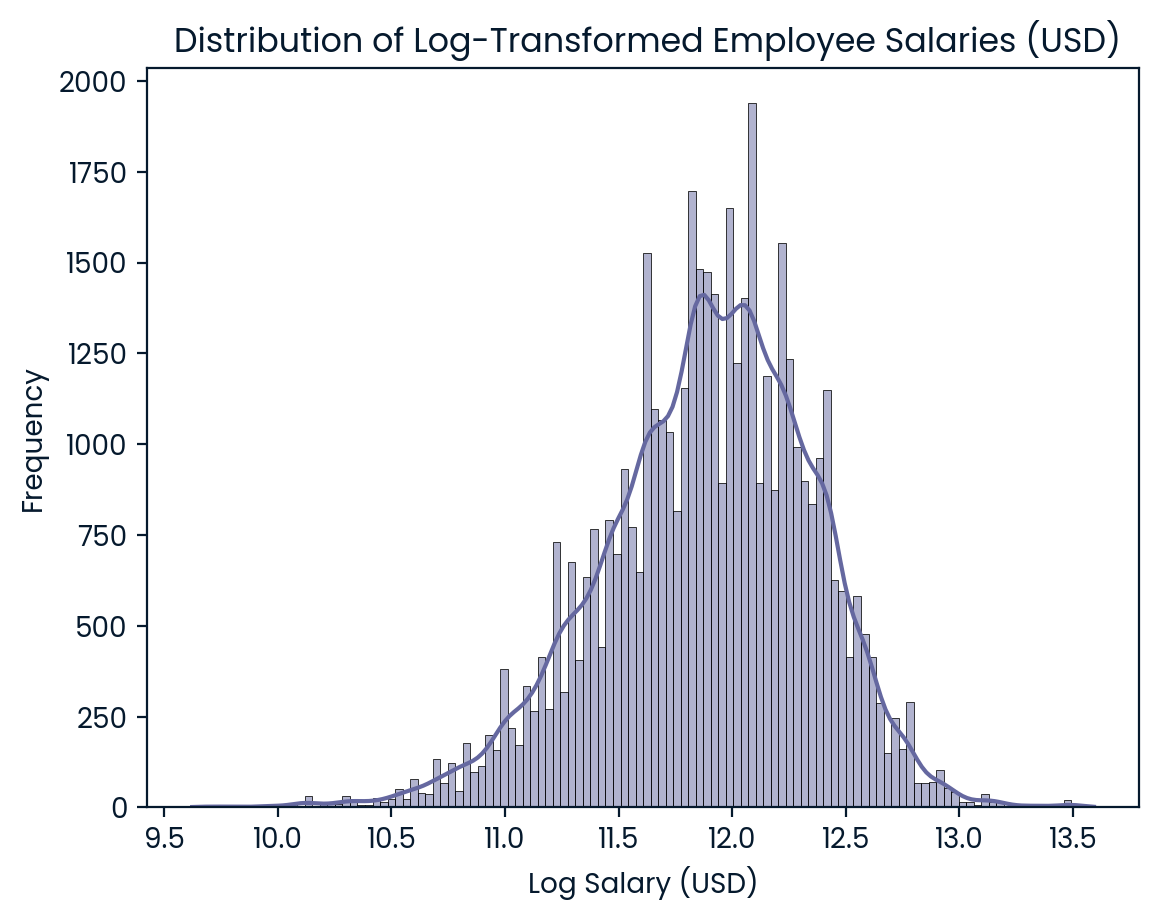

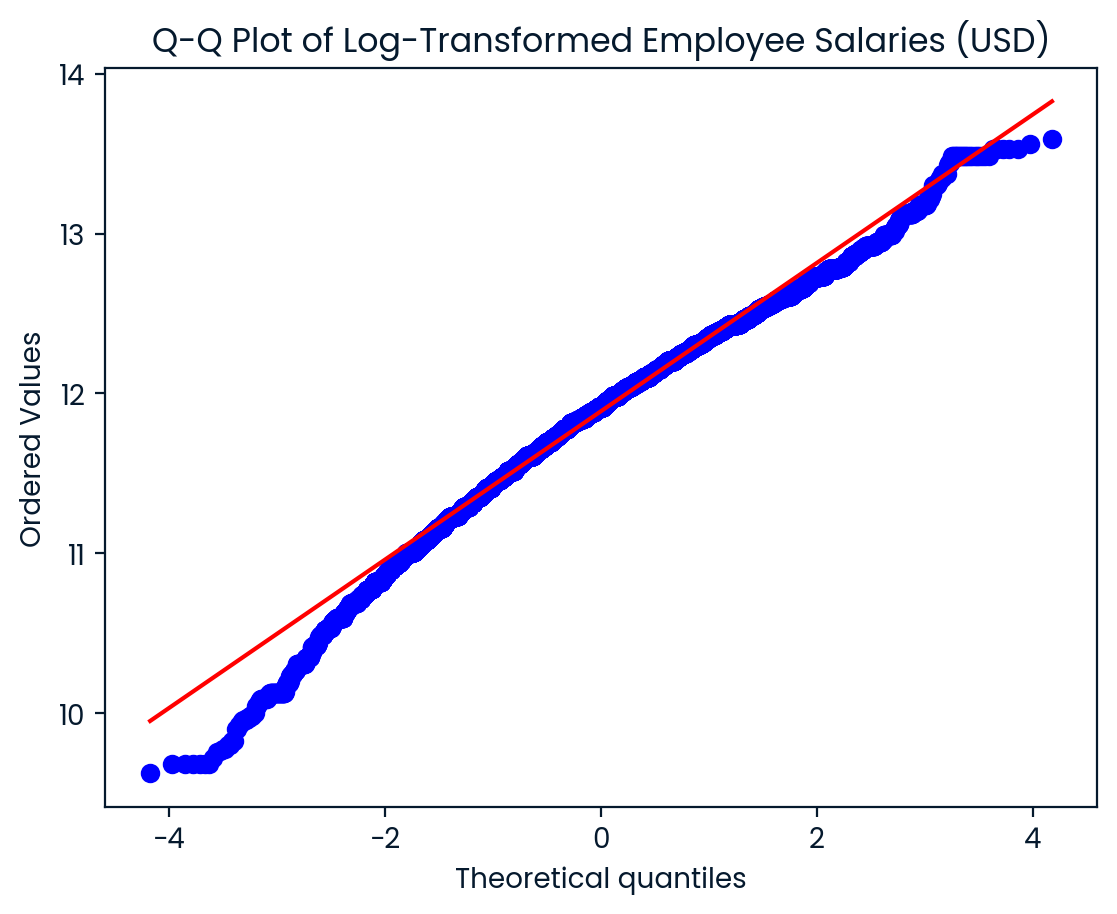

In [219]:
# Visualize the distribution using a histogram
#plt.figure(figsize=(8, 6))
sns.histplot(np.log(df_model['salary_in_usd']), kde=True)
plt.title(' Distribution of Log-Transformed Employee Salaries (USD)')
plt.xlabel('Log Salary (USD)')
plt.ylabel('Frequency')
plt.show()

# Create a Q-Q plot to check for normality
#plt.figure(figsize=(8, 6))
stats.probplot(np.log(df_model['salary_in_usd']), dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Employee Salaries (USD)')
plt.show()

However, for tree-based models (e.g., Decision Trees, Random Forest, XGBoost), normalization is not required, as these models are robust to skewed distributions and do not rely on linear assumptions.

Therefore, for models based on linear regression techniques, we apply a log transformation to ensure better predictive accuracy, while for decision tree-based models, this step can be skipped.

## `2- `Feature Selection and Encoding Strategy

#### Columns to Remove:

We will eliminate the following columns as they are either redundant or have been transformed into more useful features:

- work_year: The dataset only contains data for the year 2024, making this column irrelevant.
- job_title: Jobs have been categorized into broader groups in the newly created job_category column.
- company_location: Countries have been grouped into broader regions in the company_sub_region column.
- salary and salary_currency: Salaries have been standardized into a unified metric (salary_in_usd).
- employee_residence: This information is redundant as we will use company_location instead.

#### Selected Features:

The following columns will be used as features for model training:

`experience_level`, `employment_type`, `remote_ratio`, `company_size`, `job_category`, `company_sub_region`]

#### Feature Encoding Strategy:

From our previous exploratory analysis, we identified that most features are categorical and require encoding before training the model:

- **Ordinal Encoding:**
    - `experience_level`, `employment_type`, and `company_size` have a natural hierarchical order, making ordinal encoding the best approach.
- **Categorical Encoding:**
    - `job_category` and `company_sub_region` each have fewer than 10 unique values, allowing for multiple encoding options such as One-Hot Encoding, Label Encoding, or Frequency Encoding.
- **Numerical Feature Scaling:**
    - `remote_ratio` (with values 0, 50, and 100) will be standardized using Standard Scaling to ensure consistent feature scaling.

In [220]:
## spliting data
X= df_model.drop(['salary', 'salary_in_usd', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_region', 'work_year'], axis = 1)
y = np.log(df_model['salary_in_usd'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [221]:
#labeling categorical column
# Define the order of categories
categories = [
    ['EN', 'MI', 'SE', 'EX'],  # experience_level: Entry (EN) < Mid (MI) < Senior (SN) < Executive (EX)
    ['FL', 'PT', 'CT', 'FT'],  # employment_type: Freelance (FL) < Part-Time (PT) < Contract (CT) < Full-Time (FT)
    ['S', 'M', 'L']            # company_size: Small (S) < Medium (M) < Large (L)
]

# Initialize and fit OrdinalEncoder on training data
ordinal_encoder = OrdinalEncoder(categories=categories)

# Ensure categorical columns are string type
for col in ['experience_level', 'employment_type', 'company_size']:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

    
# Fit and transform the data (reshape required)
X_train[['experience_level', 'employment_type', 'company_size']] = ordinal_encoder.fit_transform(
    X_train[['experience_level', 'employment_type', 'company_size']]) + 1  # Adding 1 to avoid zero-based indexing
X_test[['experience_level', 'employment_type', 'company_size']] = ordinal_encoder.transform(
    X_test[['experience_level', 'employment_type', 'company_size']])+1


#labeling job_category and company_sub_region 
for col in ['job_category', 'company_sub_region']:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col]) +1
    X_test[col] = le.transform(X_test[col]) +1
    

In [222]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame(
    {'feature': X_train.columns, 'importance': feature_importances}
)

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    'importance', ascending=False
)


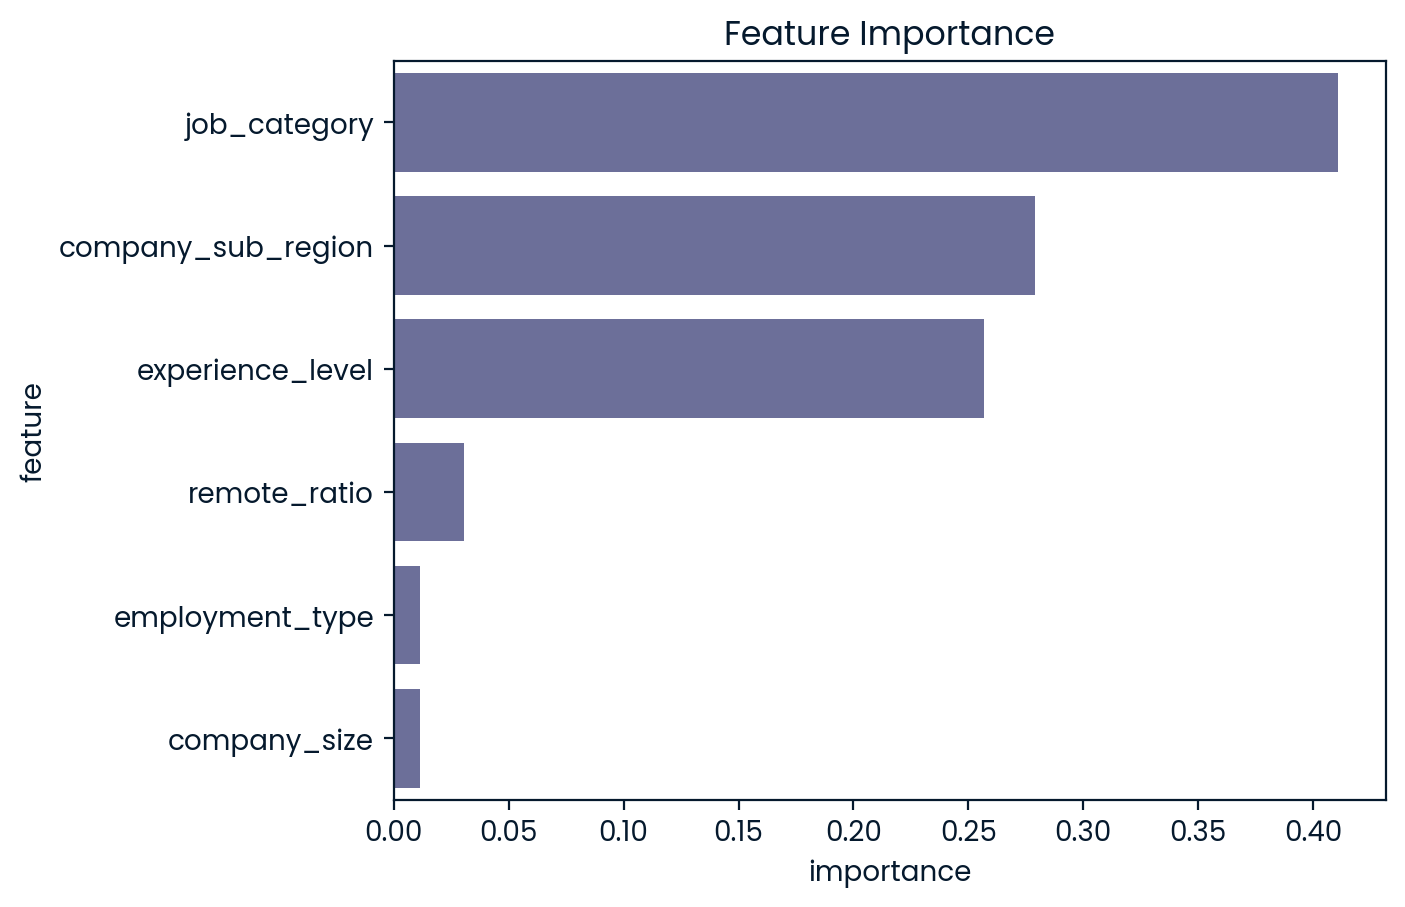

In [223]:
sns.barplot(feature_importance_df, y = 'feature', x= 'importance')
plt.title('Feature Importance');

`job_category`, `company_sub_region` and `experience_level` are the most powerful feature to predict salary in USD

In [224]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

# Define hyperparameter grid for Gradient Boosting
gb_params =  {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': [0.5, 0.75, 1.0]
}

# Apply RandomizedSearchCV
gb_model = GradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(
    gb_model, gb_params, n_iter=10, cv=5, scoring='r2', n_jobs=-1, verbose=1, random_state=42
)
random_search.fit(X_train, y_train)

# Get the best Gradient Boosting model
best_gb_model = random_search.best_estimator_

# Add it to the models dictionary
models["Gradient Boosting"] = best_gb_model

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [225]:
# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    params = model.get_params()
    
    # Store results
    results.append({"Model": name, "R2": r2, "MSE": mse, "MAE": mae, "Parameters": params})

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Display results
results_df

,Model,R2,MSE,MAE,Parameters
0,Linear Regression,0.203081,0.176284,0.331339,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,Decision Tree,0.309506,0.152742,0.308612,"{'ccp_alpha': 0.0, 'criterion': 'squared_error..."
2,Random Forest,0.307227,0.153246,0.308993,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri..."
3,Gradient Boosting,0.307769,0.153126,0.308802,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ..."


Due to the lack of continuous numerical features, the dataset primarily consists of discrete values after converting categorical variables into numerical form. This limitation affects the model's ability to capture underlying patterns, leading to a **low performance score.**

## `3- ` Model Enhancement

1. Feature Engineering

Creating new feature `vacancy_param` combine job details

`vacancy_param` = `experience_level` + `employment_type` + `company_size`

2. Target Encoding

Replacing categorical values with the mean of the target variable for each category, this is useful when a categorical feature has many unique values

We will use this encoding with job_title and company_location instead of lebel encoding

In [226]:
df_model_2 = df_2024.copy()
#make dictionary to map each job_title with its mean salary
job_title_encoding = df_model_2.groupby("job_title")["salary_in_usd"].mean().to_dict()

# Function to get target-encoded value
def encode_job_title(job_title):
    #calculate global mean to return it if job_title not exist in the dictionary 
    global_mean = sum(job_title_encoding.values()) / len(job_title_encoding) 
    return job_title_encoding.get(job_title, global_mean)

In [227]:
#make dictionary to map each company_location with its mean salary
company_location_encoding = df_model_2.groupby("company_location")["salary_in_usd"].mean().to_dict()

# Function to get target-encoded value
def encode_company_location(company_location):
    #calculate global mean to return it if comany_location not exist in the dictionary 
    global_mean = sum(company_location_encoding.values()) / len(company_location_encoding)
    return company_location_encoding.get(company_location, global_mean)

In [228]:
# Compute target mean encoding for job_title
job_title_target_mean = df_model_2.groupby('job_title')['salary_in_usd'].mean()
df_model_2['job_title_encoded'] = df_model_2['job_title'].map(job_title_target_mean)

# Compute target mean encoding for company_location
company_location_target_mean = df_model_2.groupby('company_location')['salary_in_usd'].mean()
df_model_2['company_location_encoded'] = df_model_2['company_location'].map(company_location_target_mean)

In [229]:
## spliting data
X_2= df_model_2.drop(['salary', 'salary_in_usd', 'job_title', 'salary_currency', 'company_sub_region', 'job_category',
                  'employee_residence', 'company_location', 'company_region', 'work_year'], axis = 1)
y_2 = np.log(df_model_2['salary_in_usd'])

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.3, random_state = 7)

In [230]:
#labeling categorical column
# Define the order of categories
categories = [
    ['EN', 'MI', 'SE', 'EX'],  # experience_level: Entry (EN) < Mid (MI) < Senior (SN) < Executive (EX)
    ['FL', 'PT', 'CT', 'FT'],  # employment_type: Freelance (FL) < Part-Time (PT) < Contract (CT) < Full-Time (FT)
    ['S', 'M', 'L']            # company_size: Small (S) < Medium (M) < Large (L)
]

# Initialize and fit OrdinalEncoder on training data
ordinal_encoder = OrdinalEncoder(categories=categories)

# Ensure categorical columns are string type
for col in ['experience_level', 'employment_type', 'company_size']:
    X_train_2[col] = X_train_2[col].astype(str)
    X_test_2[col] = X_test_2[col].astype(str)

    
# Fit and transform the data (reshape required)
X_train_2[['experience_level', 'employment_type', 'company_size']] = ordinal_encoder.fit_transform(
    X_train_2[['experience_level', 'employment_type', 'company_size']]) + 1  # Adding 1 to avoid zero-based indexing
X_test_2[['experience_level', 'employment_type', 'company_size']] = ordinal_encoder.transform(
    X_test_2[['experience_level', 'employment_type', 'company_size']])+1


#labeling job_category and company_sub_region 
# for col in ['job_category', 'company_sub_region']:
#     le = LabelEncoder()
#     X_train[col] = le.fit_transform(X_train[col]) +1
#     X_test[col] = le.transform(X_test[col]) +1
    
#creat new feature job_params
X_train_2['vacancy_param'] = X_train_2['experience_level'] + X_train_2['employment_type'] + X_train_2['company_size']
X_test_2['vacancy_param'] = X_test_2['experience_level'] + X_test_2['employment_type'] + X_test_2['company_size']

In [231]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_2, y_train_2)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame(
    {'feature': X_train_2.columns, 'importance': feature_importances}
)

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    'importance', ascending=False
)


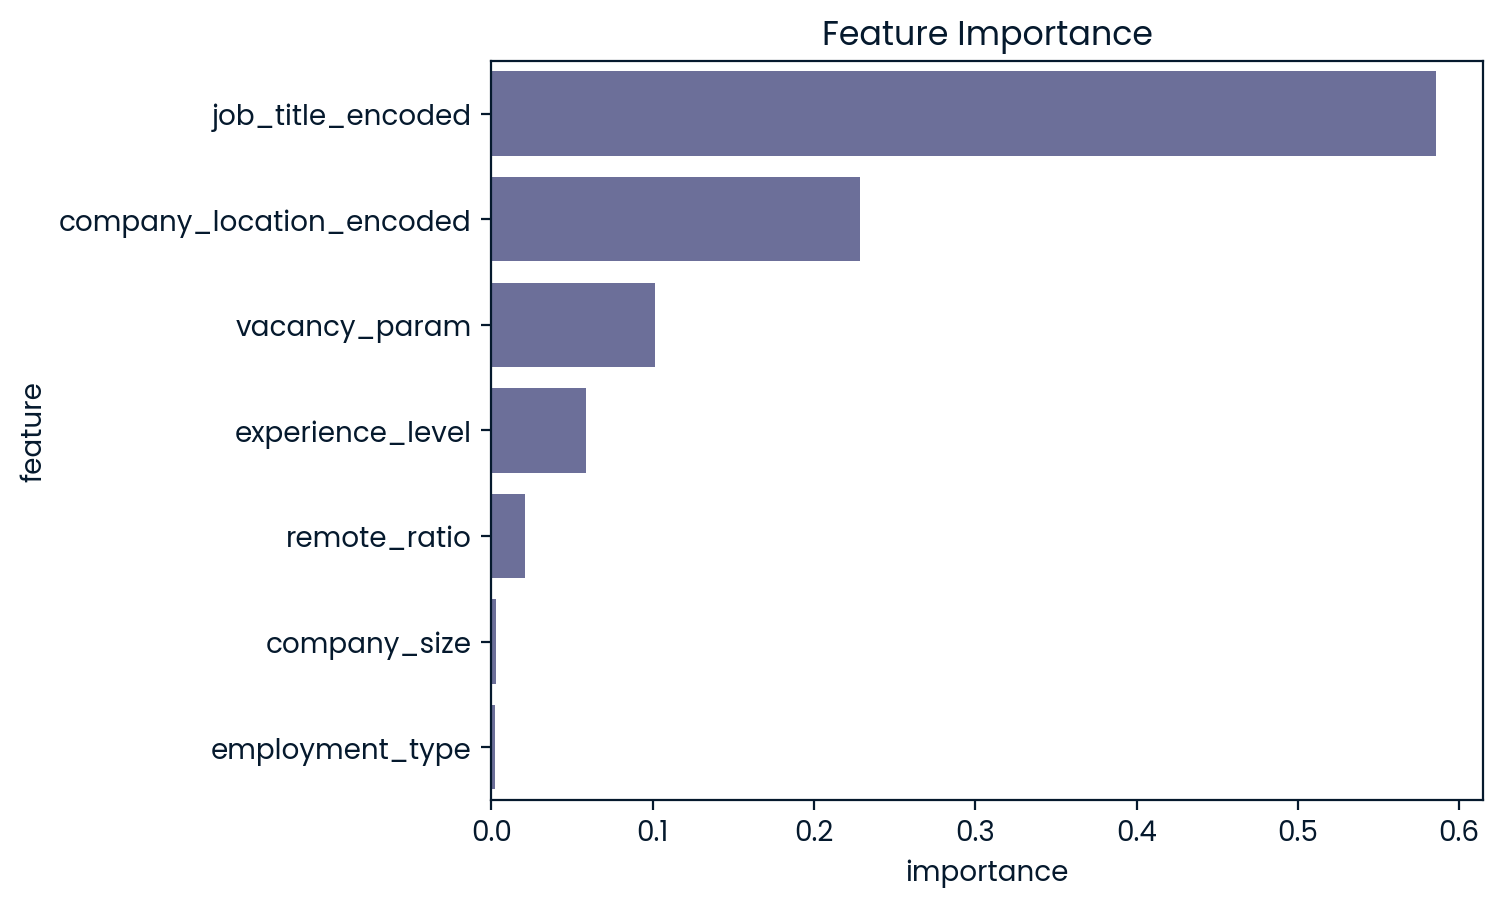

In [232]:

sns.barplot(feature_importance_df, y = 'feature', x= 'importance');
plt.title('Feature Importance');

Now, we noticed that `job_title_encoded`, `company_location_encoded` and `vacancy_param` are the most power features

**Lest check the impact of these feature on our model**

In [233]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

# Define hyperparameter grid for Gradient Boosting
gb_params =  {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': [0.5, 0.75, 1.0]
}

# Apply RandomizedSearchCV
gb_model = GradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(
    gb_model, gb_params, n_iter=10, cv=5, scoring='r2', n_jobs=-1, verbose=1, random_state=42
)
random_search.fit(X_train_2, y_train_2)

# Get the best Gradient Boosting model
best_gb_model = random_search.best_estimator_

# Add it to the models dictionary
models["Gradient Boosting"] = best_gb_model

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [234]:
# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_2, y_train_2)
    y_pred_2 = model.predict(X_test_2)
    
    # Calculate metrics
    r2 = r2_score(y_test_2, y_pred_2)
    mse = MSE(y_test_2, y_pred)
    mae = mean_absolute_error(y_test_2, y_pred_2)
    params = model.get_params()
    
    # Store results
    results.append({"Model": name, "R2": r2, "MSE": mse, "MAE": mae, "Parameters": params})

# Convert results into a DataFrame
results_df_2 = pd.DataFrame(results)

# Display results
results_df_2

,Model,R2,MSE,MAE,Parameters
0,Linear Regression,0.375584,0.153126,0.296258,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,Decision Tree,0.373705,0.153126,0.295739,"{'ccp_alpha': 0.0, 'criterion': 'squared_error..."
2,Random Forest,0.383816,0.153126,0.294541,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri..."
3,Gradient Boosting,0.386855,0.153126,0.293427,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ..."


The model's performance improved from R² = 0.30 to 0.38 due to target encoding and feature engineering.

These optimizations enhanced the model's ability to capture complex relationships, resulting in a 7% increase in R² score.

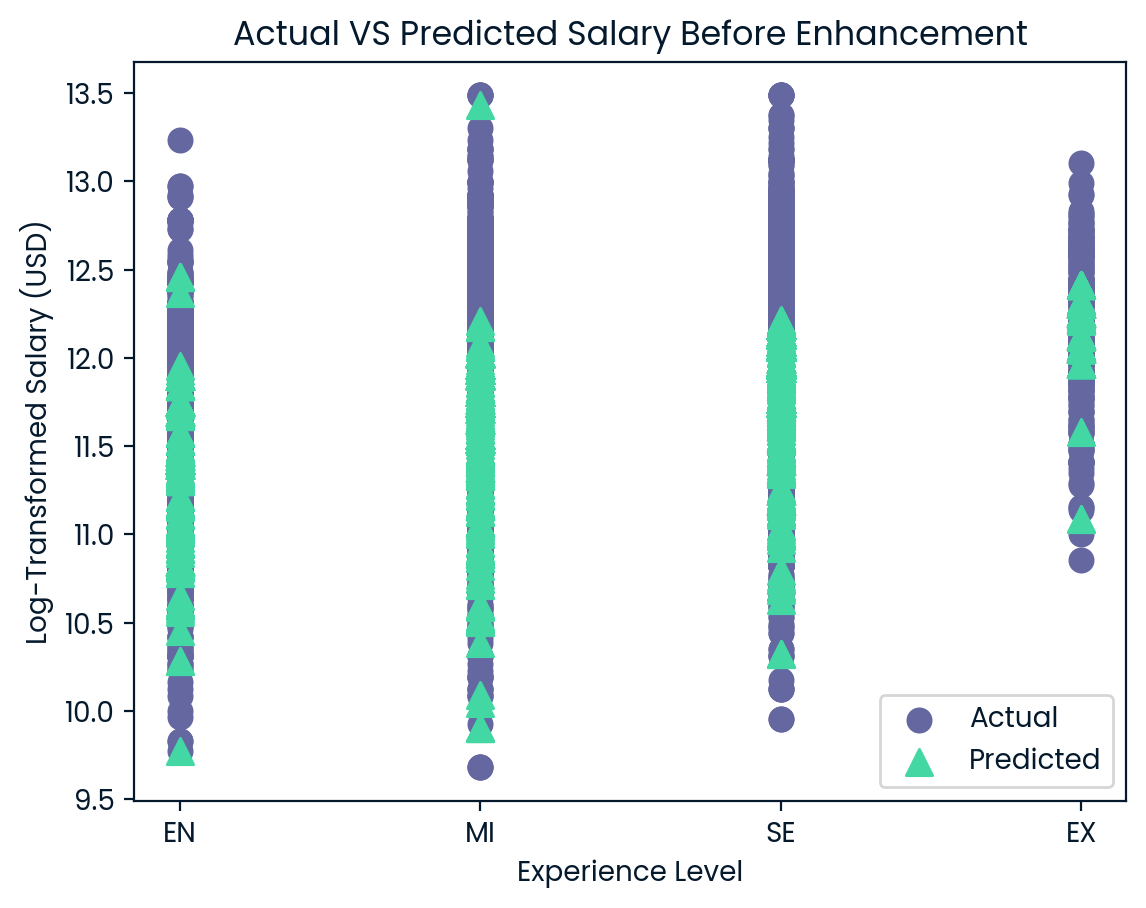

In [235]:
# Creating scatter plot to view the Actual Vs Predicted
plt.scatter(X_test['experience_level'], y_test, s=70, label='Actual')
plt.scatter(X_test['experience_level'],y_pred, s=90, marker='^', label='Predicted')
plt.title('Actual VS Predicted Salary Before Enhancement')
plt.xlabel('Experience Level')
plt.xticks([1,2,3,4], ['EN', 'MI', 'SE', 'EX'])
plt.ylabel('Log-Transformed Salary (USD)')
plt.legend();

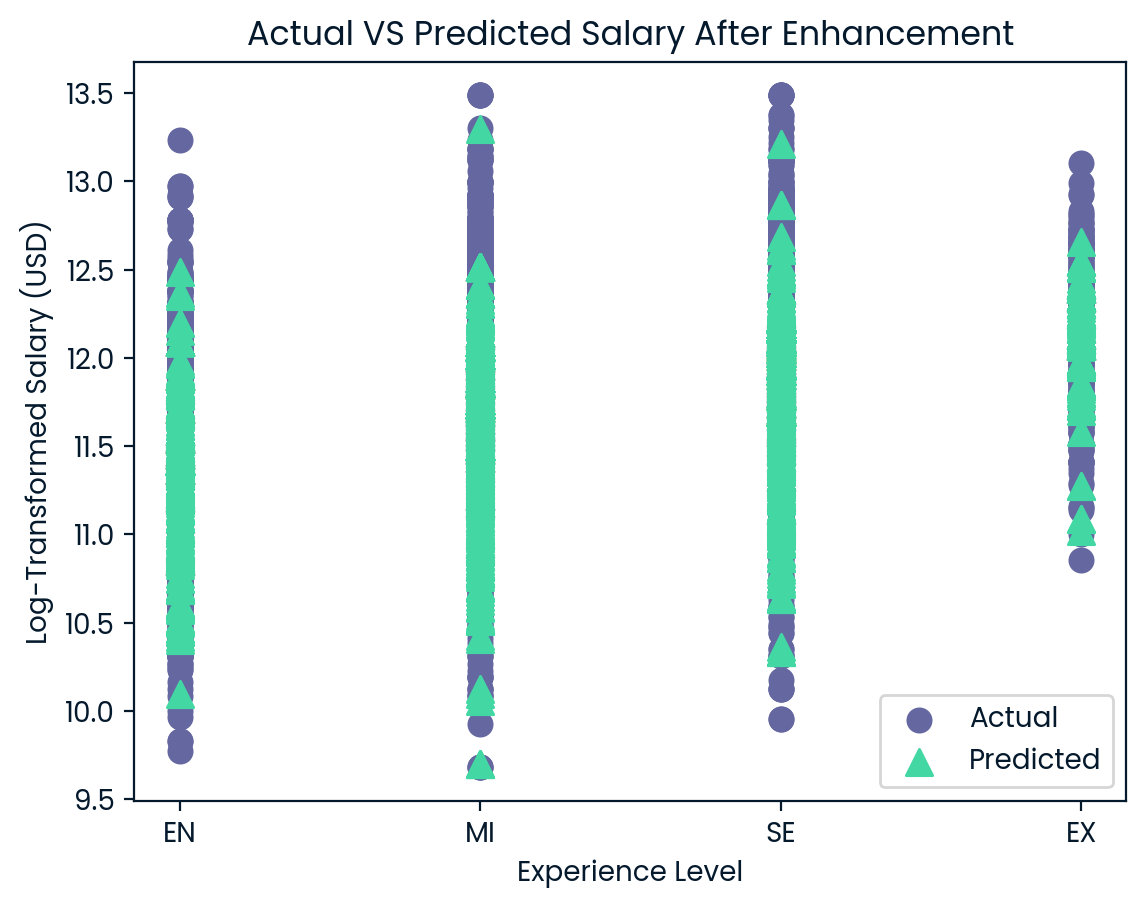

In [236]:
# Creating scatter plot to view the Actual Vs Predicted
plt.scatter(X_test_2['experience_level'], y_test_2, s=70, label='Actual')
plt.scatter(X_test_2['experience_level'],y_pred_2, s=90, marker='^', label='Predicted')
plt.title('Actual VS Predicted Salary After Enhancement')
plt.xlabel('Experience Level')
plt.xticks([1,2,3,4], ['EN', 'MI', 'SE', 'EX'])
plt.ylabel('Log-Transformed Salary (USD)')
plt.legend();

### Let's Predict Salary Using Gradient Boosting Model
- As Gradient Boosting Model give us the highest score

In [237]:

# 1. Create new DataFrame with job_category as a column
new_data = pd.DataFrame({
    "job_title": ["Data Science", "Machine Learning", "Manager", 'AI Eng'],  # New input
    "experience_level": ["SE", "MI", "EX", 'SE'],  
    "employment_type": ["FT", "CT", "FT", "FT"],  
    "remote_ratio": [50, 100, 0, 100],  
    "company_size": ["M", "L", "S", "M"],
    "company_location" : ["USA", "Canada", "Egypt", "United Kingdom"]
})

# 2. create dict to map values
experience_level_encoding = {
    "EN": 1,  # Entry Level
    "MI": 2,  # Mid-Level
    "SE": 3,  # Senior-Level
    "EX": 4   # Executive
}

employment_type_encoding = {
    "PT": 1,  # Part-Time
    "CT": 2,  # Contract
    "FL": 3,  # Freelance
    "FT": 4   # Full-Time
}

company_size_encoding = {
    "S": 1,  # Small
    "M": 2,  # Medium
    "L": 3   # Large
}


# 3. Apply target encoding to 'job_category' and 'company_location' columns
new_data["job_title_encoded"] = new_data["job_title"].map(encode_job_title)
new_data["company_location_encoded"] = new_data["company_location"].map(encode_company_location)

# 4. Apply mapping for ordinal encoding columns
new_data["experience_level"] = new_data["experience_level"].map(experience_level_encoding)
new_data["employment_type"] = new_data["employment_type"].map(employment_type_encoding)
new_data["company_size"] = new_data["company_size"].map(company_size_encoding)

# 5. Creat new feature 'vacancy_param'
new_data["vacancy_param"] = new_data["experience_level"] + new_data["employment_type"] + new_data["company_size"]

# 6. drop unused column by the model
new_data = new_data.drop(['job_title', 'company_location'], axis=1)

# 7. Feed transformed data into the model for prediction
predicted_salary = model.predict(new_data)

# 8. Convert salay from log_transformed value to normal
print(np.exp(predicted_salary))


[147237.04146553 111603.45318386 152832.93097044 112594.2239269 ]


In [238]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_2, y_train_2)
# Predict the labels of training set
y_predict_train = rf.predict(X_train_2)

# Predict the labels of test set
y_predict_test = rf.predict(X_test_2)



# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train_2, y_predict_train)))

# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test_2, y_predict_test)))

Train MSE: 0.13
Test MSE: 0.14


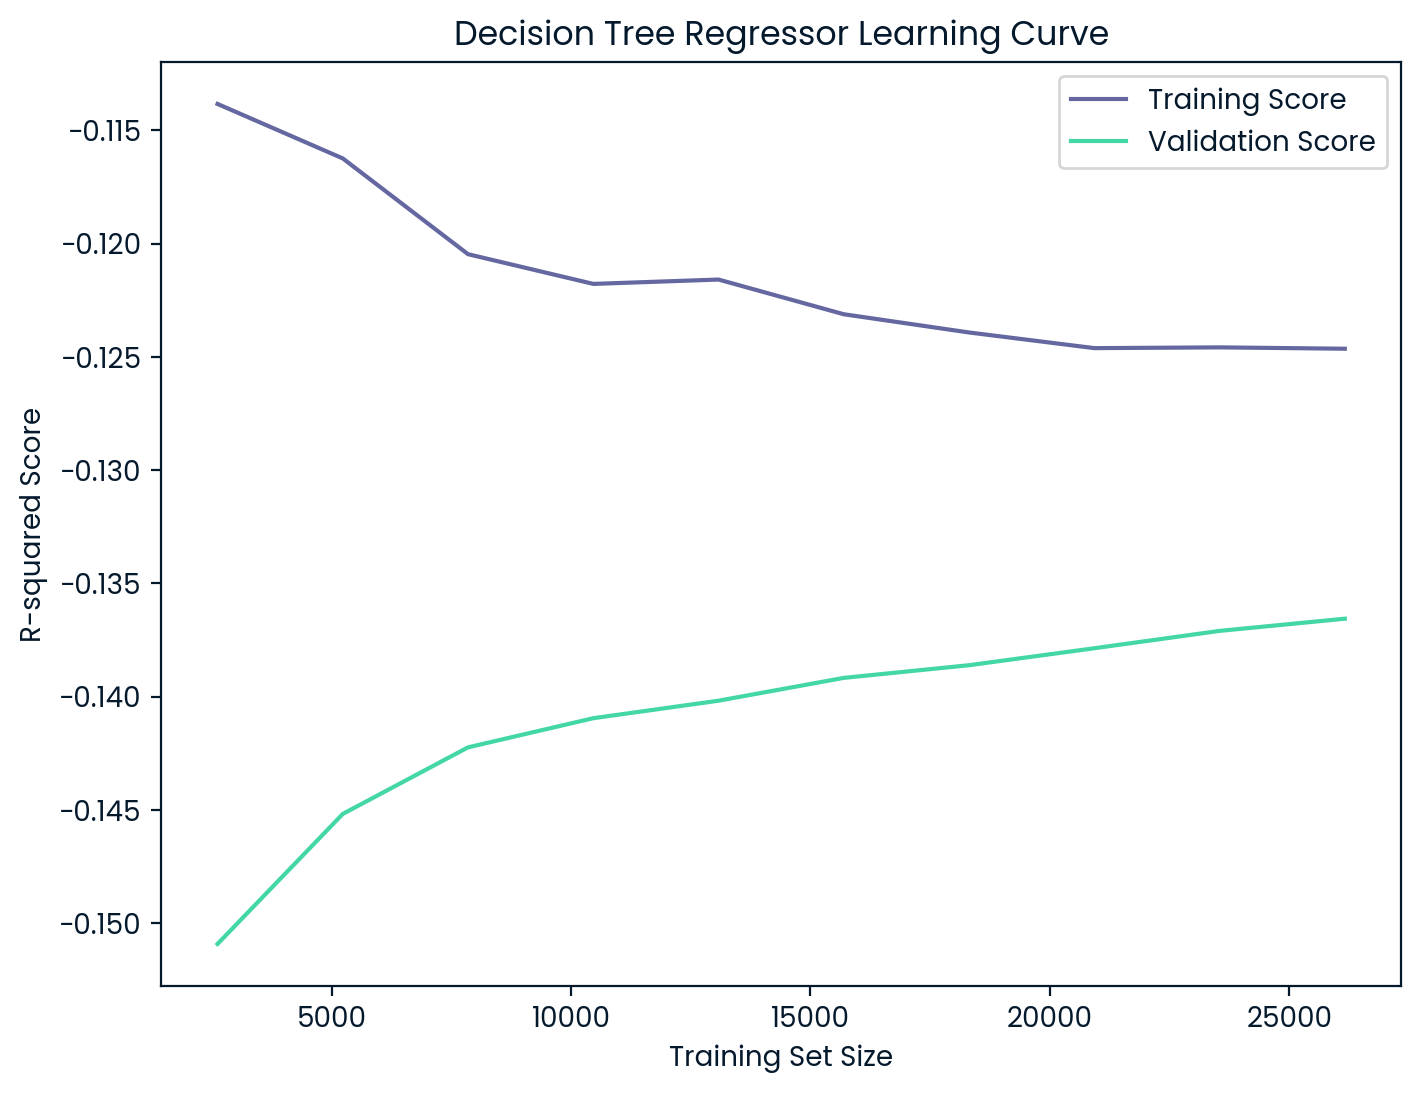

In [239]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

# Generate the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    rf, X_train_2, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.title('Decision Tree Regressor Learning Curve')
plt.legend()
plt.show()

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!